In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_csv(r'C:\Users\aryan\OneDrive\Desktop\Data Science\Finlatics\DsResearch\Banking\banking_data.csv')

# Data Assessing

### Summary

The dataset captures detailed records of 45,211 customer interactions from a Portuguese bank's direct marketing campaigns conducted through phone calls between May 2008 and November 2010. The primary goal is to predict whether a customer will subscribe to a term deposit product.  Information includes customer attributes (age, profession, marital status, education, financial product holdings), campaign details (contact method, timing, call duration, previous outcomes), and potentially external factors like interest rates. Analyzing this data aims to determine the overall conversion rate of the campaigns, identify the key customer and campaign characteristics driving subscription decisions, and potentially uncover temporal trends that might impact future marketing strategies.

### Column Description

+ <u>**age:**</u> This column represents the age of the bank client. It's a numeric variable indicating the age in years.

+ <u>**job:**</u> This column indicates the type of job the client has. It's a categorical variable with options such as "admin.", "unknown", "unemployed", "management", etc.

+ <u>**marital:**</u> This column represents the marital status of the client. It's a categorical variable with options such as "married", "divorced", or "single".

+ <u>**education:**</u> This column indicates the level of education of the client. It's a categorical variable with options such as "unknown", "secondary", "primary", or "tertiary".

+ <u>**default:**</u> This column indicates whether the client has credit in default. It's a binary variable with options "yes" or "no".

+ <u>**balance:**</u> This column represents the average yearly balance in euros for the client. It's a numeric variable.

+ <u>**housing:**</u> This column indicates whether the client has a housing loan. It's a binary variable with options "yes" or "no".

+ <u>**loan:**</u> This column indicates whether the client has a personal loan. It's a binary variable with options "yes" or "no".

+ <u>**contact:**</u> This column represents the type of communication used to contact the client. It's a categorical variable with options such as "unknown", "telephone", or "cellular".

+ <u>**day:**</u> This column represents the last contact day of the month. It's a numeric variable.

+ <u>**month:**</u> This column represents the last contact month of the year. It's a categorical variable with options such as "jan", "feb", "mar", etc.

+ <u>**duration:**</u> This column represents the duration of the last contact in seconds. It's a numeric variable.

+ <u>**campaign:**</u> This column represents the number of contacts performed during this campaign and for this client. It's a numeric variable.

+ <u>**pdays:**</u> This column represents the number of days that passed by after the client was last contacted from a previous campaign. It's a numeric variable where -1 means the client was not previously contacted.

+ <u>**previous:**</u> This column represents the number of contacts performed before this campaign and for this client. It's a numeric variable.

+ <u>**poutcome:**</u> This column represents the outcome of the previous marketing campaign. It's a categorical variable with options such as "unknown", "other", "failure", or "success".

+ <u>**y:**</u> This column is the target variable and indicates whether the client has subscribed to a term deposit. It's a binary variable with options "yes" or "no".



### Additional Info

Additional useful informtion:
Year column is missing in the data but the data is arranged in chronological order.We can use this fact to come up with the year column's values

### Issues with the Dataset

1. <u>**Dirty Data(Quality Related)**</u>

+ marital and marital_status both have data in 3 rows missing (44996,45077,45209) `completeness`

+ edcation also has data in 3 rows missing(44957,45137,45170) `completeness`

+ 5 duplicate entries in the dataframe(45211,45212,45213,45214,45215) `validity`

+ job,marital,marital_status,education,default,housing,loan,contact,poutcome,y : All these should be Categorical `validity`

+ There is no year clmn `completeness`


2. <u>**Messy Data(Structural)**</u>

+ marital and marital_status clmns are exactly the same so there is no need for both of them

+ day,month,day_month clmns should be merged into one and there dtype shld be Datetime

+ In the above merged clmn year has to be added

In [5]:
# Creating a copy of the Datframe
df1 = df.copy()

In [6]:
df1.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [7]:
df1.isnull().sum()

age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [9]:
df1.shape

(45216, 19)

In [10]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000
mean,40.938186,1362.277844,15.806507,258.166202,2.763668,40.202428,0.580657
std,10.621249,3044.609674,8.322022,257.515482,3.097896,100.128248,2.303778
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.500000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df1['job'].isnull().sum()

0

In [12]:
df1['marital_status'].isnull().sum()

3

In [13]:
df1[df1['marital'].isnull()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44996,75,retired,NaN,NaN,secondary,no,1092,no,no,telephone,12,oct,12-Oct,250,1,431,2,failure,no
45077,20,student,NaN,NaN,secondary,no,88,no,no,telephone,21,oct,21-Oct,621,1,181,4,other,no
45209,57,blue-collar,NaN,NaN,secondary,no,668,no,no,telephone,17,nov,17-Nov,508,4,-1,0,unknown,no


In [14]:
df1[df1['marital'].isnull()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44996,75,retired,NaN,NaN,secondary,no,1092,no,no,telephone,12,oct,12-Oct,250,1,431,2,failure,no
45077,20,student,NaN,NaN,secondary,no,88,no,no,telephone,21,oct,21-Oct,621,1,181,4,other,no
45209,57,blue-collar,NaN,NaN,secondary,no,668,no,no,telephone,17,nov,17-Nov,508,4,-1,0,unknown,no


In [15]:
df1[~(df1['marital_status'] == df1['marital'])]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44996,75,retired,NaN,NaN,secondary,no,1092,no,no,telephone,12,oct,12-Oct,250,1,431,2,failure,no
45077,20,student,NaN,NaN,secondary,no,88,no,no,telephone,21,oct,21-Oct,621,1,181,4,other,no
45209,57,blue-collar,NaN,NaN,secondary,no,668,no,no,telephone,17,nov,17-Nov,508,4,-1,0,unknown,no


+ marital and marital_staatus have the same missing values

In [16]:
df1['education'].isnull().sum()

3

In [17]:
df1[df1['education'].isnull()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44957,32,management,single,single,NaN,no,3289,no,no,cellular,8,oct,8-Oct,375,2,179,2,failure,no
45137,30,management,single,single,NaN,no,297,no,no,cellular,8,nov,8-Nov,188,1,-1,0,unknown,yes
45170,19,student,single,single,NaN,no,245,no,no,telephone,10,nov,10-Nov,98,2,110,2,other,no


In [18]:
df1['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45216 entries, 0 to 45215
Series name: education
Non-Null Count  Dtype 
--------------  ----- 
45213 non-null  object
dtypes: object(1)
memory usage: 353.4+ KB


In [19]:
df1[df1.duplicated()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes
45215,71,retired,divorced,divorced,primary,no,1729,no,no,cellular,17,nov,17-Nov,456,2,-1,0,unknown,yes


In [20]:
df1['job'].value_counts()

job
blue-collar      9732
management       9460
technician       7597
admin.           5171
services         4154
retired          2267
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [21]:
df1['marital_status'].value_counts()

marital_status
married     27216
single      12790
divorced     5207
Name: count, dtype: int64

In [22]:
df1['default'].value_counts()

default
no     44401
yes      815
Name: count, dtype: int64

In [23]:
df1['education'].value_counts()

education
secondary    23204
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [24]:
df1['housing'].value_counts()

housing
yes    25130
no     20086
Name: count, dtype: int64

In [25]:
df1['loan'].value_counts()

loan
no     37972
yes     7244
Name: count, dtype: int64

In [26]:
df1['contact'].value_counts()

contact
cellular     29290
unknown      13020
telephone     2906
Name: count, dtype: int64

In [27]:
df1['poutcome'].value_counts()

poutcome
unknown    36961
failure     4902
other       1840
success     1513
Name: count, dtype: int64

In [28]:
df1['y'].value_counts()

y
no     39922
yes     5294
Name: count, dtype: int64

# Data Cleaning

### 1. Missing Values in marital/marital_status and education clmns

+ Since there is no way to fill the missing value,I'm replacing the null values in the data frame with the string ,'No Data'

In [29]:
df1 = df1.fillna('No Data')

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45216 non-null  object
 3   marital_status  45216 non-null  object
 4   education       45216 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

+ Null values filled

In [31]:
df1.iloc[44996,:]

age                      75
job                 retired
marital             No Data
marital_status      No Data
education         secondary
default                  no
balance                1092
housing                  no
loan                     no
contact           telephone
day                      12
month                   oct
day_month            12-Oct
duration                250
campaign                  1
pdays                   431
previous                  2
poutcome            failure
y                        no
Name: 44996, dtype: object

### 2. Missing year clmn

In [32]:
month_dict = {month: 1 if month in ['jan', 'feb', 'mar'] else 0 for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']}
print(month_dict) 

{'jan': 1, 'feb': 1, 'mar': 1, 'apr': 0, 'may': 0, 'jun': 0, 'jul': 0, 'aug': 0, 'sep': 0, 'oct': 0, 'nov': 0, 'dec': 0}


In [33]:
df1 = df1.reset_index()

In [34]:
df1.columns

Index(['index', 'age', 'job', 'marital', 'marital_status', 'education',
       'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'day_month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [35]:
df1.iloc[44996,12]

'oct'

In [36]:
def find_year(index):
    month = df1.iloc[index,12]
    if index != 0 :
        month_prev = df1.iloc[index-1,12]
        if(month == month_prev):
            return 2008 + month_dict[month]
        else : 
            month_dict[month_prev] = month_dict[month_prev] + 1
            return 2008 + month_dict[month]
    else : return 2008
    

In [37]:
df1['year'] = df1['index'].apply(find_year)

In [38]:
df1['year'].value_counts()

year
2008    30729
2009    12373
2010     2114
Name: count, dtype: int64

In [39]:
df1['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45216 entries, 0 to 45215
Series name: year
Non-Null Count  Dtype
--------------  -----
45216 non-null  int64
dtypes: int64(1)
memory usage: 353.4 KB


In [40]:
df1.head()

,index,age,job,marital,marital_status,education,default,balance,housing,loan,...,day,month,day_month,duration,campaign,pdays,previous,poutcome,y,year
0,0,58,management,married,married,tertiary,no,2143,yes,no,...,5,may,5-May,261,1,-1,0,unknown,no,2008
1,1,44,technician,single,single,secondary,no,29,yes,no,...,5,may,5-May,151,1,-1,0,unknown,no,2008
2,2,33,entrepreneur,married,married,secondary,no,2,yes,yes,...,5,may,5-May,76,1,-1,0,unknown,no,2008
3,3,47,blue-collar,married,married,unknown,no,1506,yes,no,...,5,may,5-May,92,1,-1,0,unknown,no,2008
4,4,33,unknown,single,single,unknown,no,1,no,no,...,5,may,5-May,198,1,-1,0,unknown,no,2008


### 3. Changing dtype to Categorical for appropriate columns

In [41]:
df1[['job','marital','marital_status','education','default','housing','loan','contact','poutcome','y']] = df1[['job','marital','marital_status','education','default','housing','loan','contact','poutcome','y']].astype('category')

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   index           45216 non-null  int64   
 1   age             45216 non-null  int64   
 2   job             45216 non-null  category
 3   marital         45216 non-null  category
 4   marital_status  45216 non-null  category
 5   education       45216 non-null  category
 6   default         45216 non-null  category
 7   balance         45216 non-null  int64   
 8   housing         45216 non-null  category
 9   loan            45216 non-null  category
 10  contact         45216 non-null  category
 11  day             45216 non-null  int64   
 12  month           45216 non-null  object  
 13  day_month       45216 non-null  object  
 14  duration        45216 non-null  int64   
 15  campaign        45216 non-null  int64   
 16  pdays           45216 non-null  int64   
 17  previous    

### 4. marital and marital_status columns

+ Both of these columns are exactly the same so I will remove the `marital` column and keep `marital_status` column

In [43]:
df1.columns

Index(['index', 'age', 'job', 'marital', 'marital_status', 'education',
       'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'day_month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y', 'year'],
      dtype='object')

In [44]:
df1 = df1.drop('marital',axis=1)

In [45]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'day_month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

### 5. Merging the day,month,day_month and year columns into a single column with dtype = datetime

In [46]:
dt_sample = pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

In [47]:
type(dt_sample)

pandas.core.indexes.datetimes.DatetimeIndex

In [48]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'day_month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

In [49]:
df1['day'] = df1['day'].astype('string')

In [50]:
df1['year'] = df1['year'].astype('string')

In [51]:
date = pd.Series(df1.iloc[:,10] +'-'+ df1.iloc[:,11] + '-' + df1.iloc[:,19])

In [52]:
date

0         5-may-2008
1         5-may-2008
2         5-may-2008
3         5-may-2008
4         5-may-2008
            ...     
45211    16-nov-2010
45212    16-nov-2010
45213    17-nov-2010
45214    17-nov-2010
45215    17-nov-2010
Length: 45216, dtype: string

In [53]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'day_month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

In [54]:
df1.insert(10,'date',date)

In [55]:
df1['date'] = pd.to_datetime(date,format="mixed",dayfirst=True)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           45216 non-null  int64         
 1   age             45216 non-null  int64         
 2   job             45216 non-null  category      
 3   marital_status  45216 non-null  category      
 4   education       45216 non-null  category      
 5   default         45216 non-null  category      
 6   balance         45216 non-null  int64         
 7   housing         45216 non-null  category      
 8   loan            45216 non-null  category      
 9   contact         45216 non-null  category      
 10  date            45216 non-null  datetime64[ns]
 11  day             45216 non-null  string        
 12  month           45216 non-null  object        
 13  day_month       45216 non-null  object        
 14  duration        45216 non-null  int64         
 15  ca

In [57]:
df1.head()

,index,age,job,marital_status,education,default,balance,housing,loan,contact,...,day,month,day_month,duration,campaign,pdays,previous,poutcome,y,year
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,...,5,may,5-May,261,1,-1,0,unknown,no,2008
1,1,44,technician,single,secondary,no,29,yes,no,unknown,...,5,may,5-May,151,1,-1,0,unknown,no,2008
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,5,may,5-May,76,1,-1,0,unknown,no,2008
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,...,5,may,5-May,92,1,-1,0,unknown,no,2008
4,4,33,unknown,single,unknown,no,1,no,no,unknown,...,5,may,5-May,198,1,-1,0,unknown,no,2008


In [58]:
df1.tail()

,index,age,job,marital_status,education,default,balance,housing,loan,contact,...,day,month,day_month,duration,campaign,pdays,previous,poutcome,y,year
45211,45211,29,management,single,tertiary,no,765,no,no,cellular,...,16,nov,16-Nov,238,1,-1,0,unknown,yes,2010
45212,45212,68,retired,married,secondary,no,1146,no,no,cellular,...,16,nov,16-Nov,212,1,187,6,success,yes,2010
45213,45213,53,management,married,tertiary,no,583,no,no,cellular,...,17,nov,17-Nov,226,1,184,4,success,yes,2010
45214,45214,73,retired,married,secondary,no,2850,no,no,cellular,...,17,nov,17-Nov,300,1,40,8,failure,yes,2010
45215,45215,71,retired,divorced,primary,no,1729,no,no,cellular,...,17,nov,17-Nov,456,2,-1,0,unknown,yes,2010


+ Now I will drop the day,month and day_month Columns

In [59]:
df1 = df1.drop(['day','month','day_month'],axis=1)

In [60]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

### 6. Dropping Duplicate Entries

In [61]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

In [62]:
df1[df1.duplicated(subset=[ 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y', 'year'],keep='first')]

,index,age,job,marital_status,education,default,balance,housing,loan,contact,date,duration,campaign,pdays,previous,poutcome,y,year
45211,45211,29,management,single,tertiary,no,765,no,no,cellular,2010-11-16,238,1,-1,0,unknown,yes,2010
45212,45212,68,retired,married,secondary,no,1146,no,no,cellular,2010-11-16,212,1,187,6,success,yes,2010
45213,45213,53,management,married,tertiary,no,583,no,no,cellular,2010-11-17,226,1,184,4,success,yes,2010
45214,45214,73,retired,married,secondary,no,2850,no,no,cellular,2010-11-17,300,1,40,8,failure,yes,2010
45215,45215,71,retired,divorced,primary,no,1729,no,no,cellular,2010-11-17,456,2,-1,0,unknown,yes,2010


In [63]:
df1 = df1.drop_duplicates(subset=[ 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y', 'year'],keep='first')

In [64]:
df1[df1.duplicated(subset=[ 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y', 'year'],keep='first')]

,index,age,job,marital_status,education,default,balance,housing,loan,contact,date,duration,campaign,pdays,previous,poutcome,y,year


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           45211 non-null  int64         
 1   age             45211 non-null  int64         
 2   job             45211 non-null  category      
 3   marital_status  45211 non-null  category      
 4   education       45211 non-null  category      
 5   default         45211 non-null  category      
 6   balance         45211 non-null  int64         
 7   housing         45211 non-null  category      
 8   loan            45211 non-null  category      
 9   contact         45211 non-null  category      
 10  date            45211 non-null  datetime64[ns]
 11  duration        45211 non-null  int64         
 12  campaign        45211 non-null  int64         
 13  pdays           45211 non-null  int64         
 14  previous        45211 non-null  int64         
 15  poutcom

# Exloratory Data Analysis

## 1. Distribution of age among clients

In [66]:
df1['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [67]:
df1['age'].skew()

0.6848179257252598

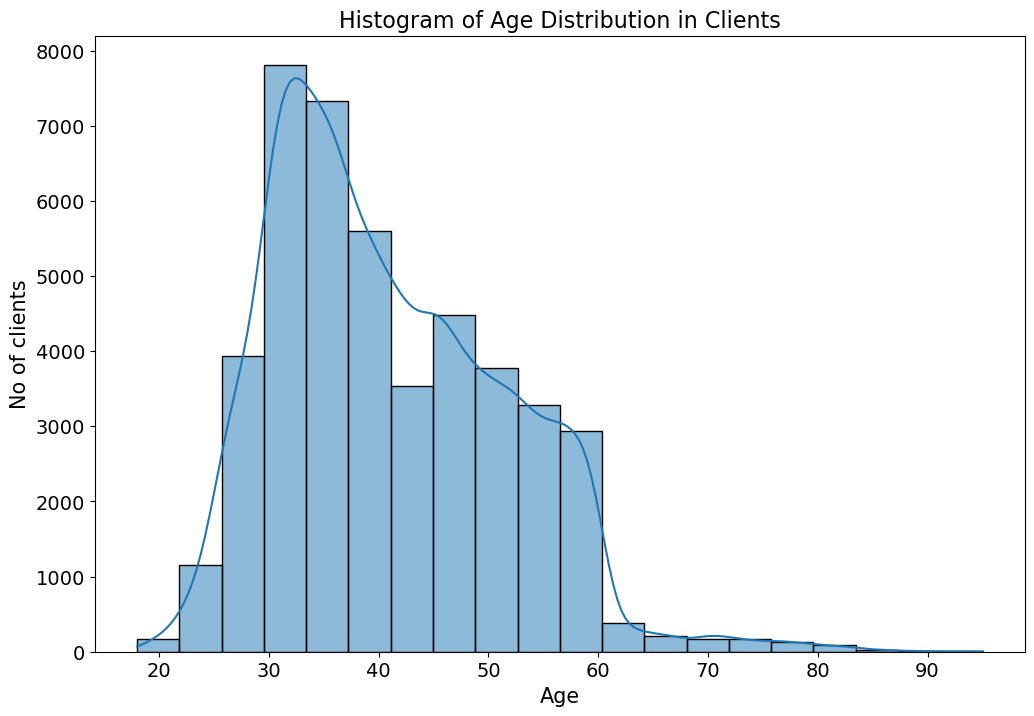

In [68]:
plt.figure(figsize=(12,8))
sns.histplot(df1['age'],bins=20,kde=True)
plt.title('Histogram of Age Distribution in Clients',fontsize = 16)
plt.xlabel('Age',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

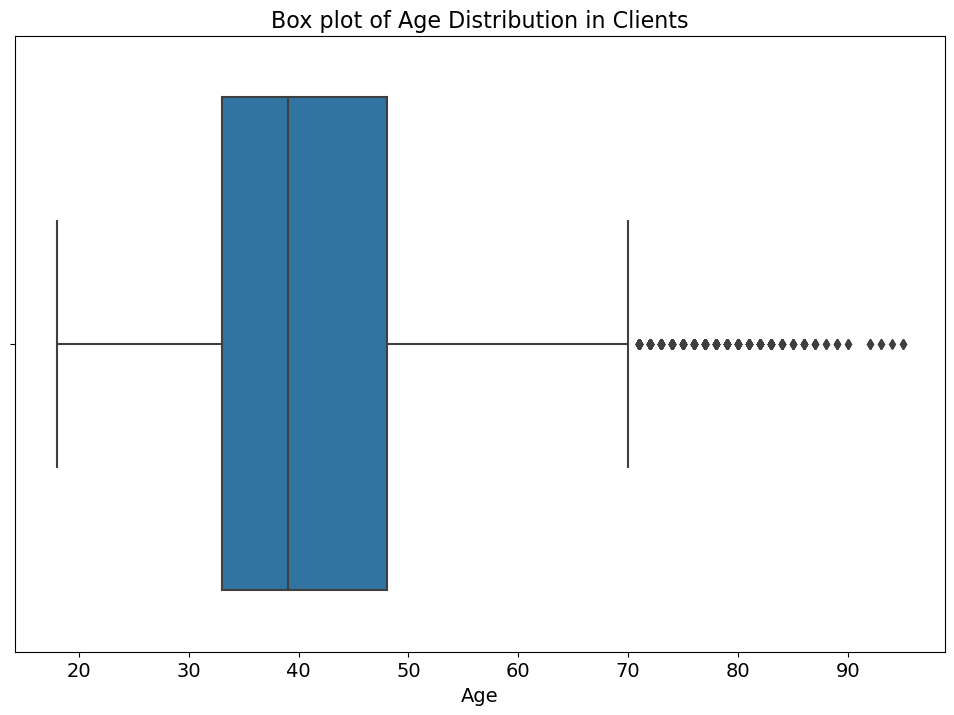

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,x='age')
plt.title('Box plot of Age Distribution in Clients',fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [70]:
df1[(df1['age']>=30) & (df1['age']<=40)].shape[0]/df1.shape[0]

0.4300723275309106

In [71]:
df1[df1['age']>70].shape[0]

487

`Conclusions:` 

1. 43% of the clients are between the age of 30 and 40 

2. Clients above the age of 70 are classified as outliers (487 such entries)

3. The age column data is Normally Distributed

4. The median is 39 years

## 2. Job type variation among clients

In [72]:
df1['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [73]:
df1['job'].value_counts().tolist()

[9732, 9458, 7597, 5171, 4154, 2264, 1579, 1487, 1303, 1240, 938, 288]

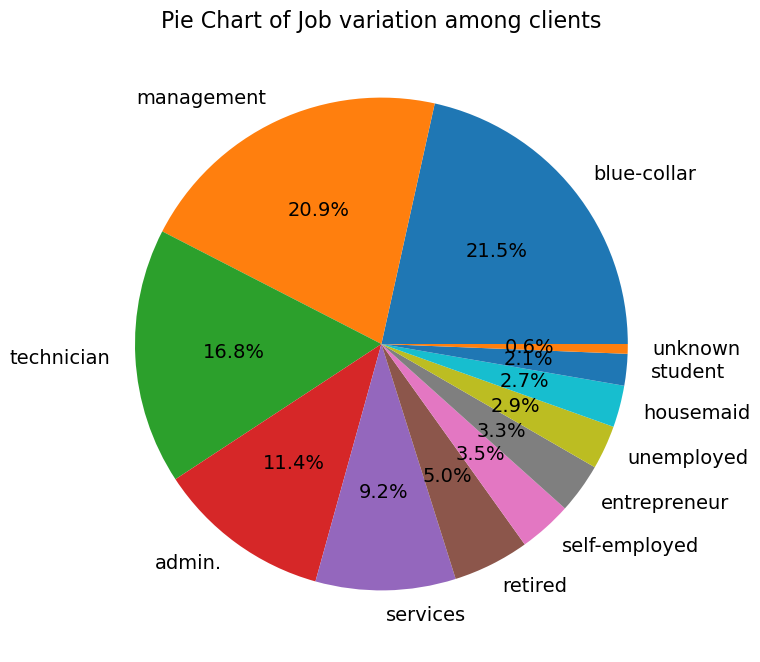

In [74]:
plt.figure(figsize=(12,8))
plt.pie(df1['job'].value_counts().tolist(),labels=df1['job'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie Chart of Job variation among clients',fontsize=16)
plt.show()

In [75]:
df1['job'].value_counts(sort=True).keys()

CategoricalIndex(['blue-collar', 'management', 'technician', 'admin.',
                  'services', 'retired', 'self-employed', 'entrepreneur',
                  'unemployed', 'housemaid', 'student', 'unknown'],
                 categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown'], ordered=False, dtype='category', name='job')

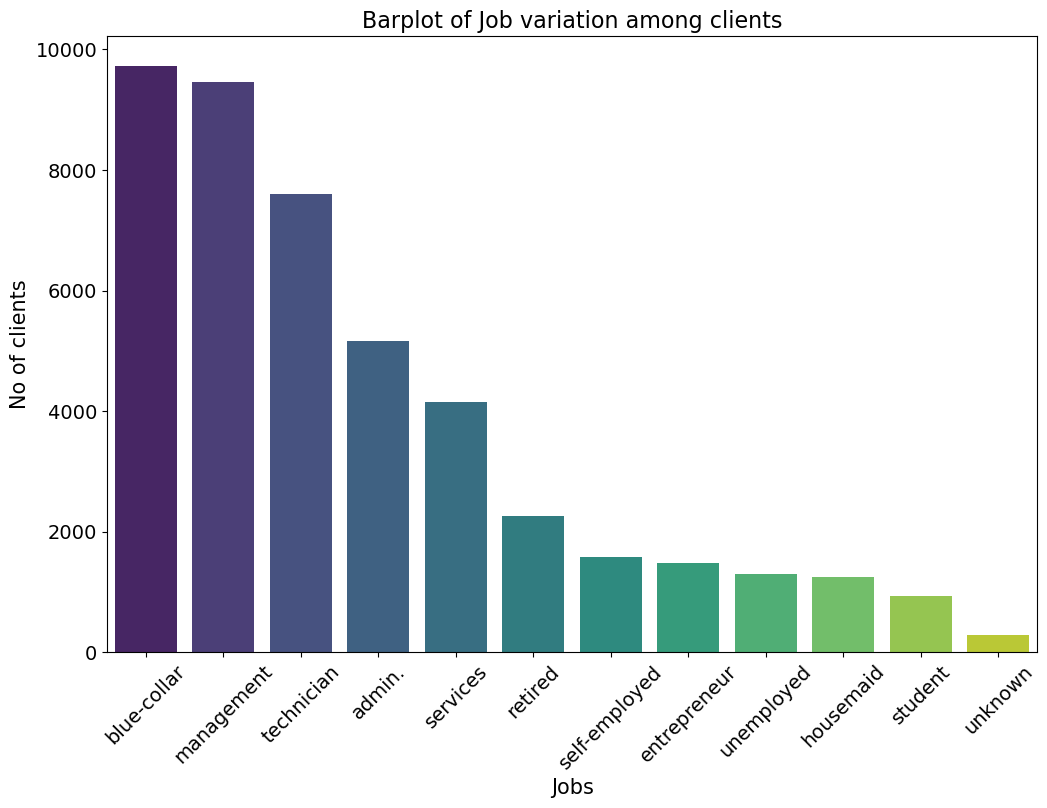

In [76]:
order = ['blue-collar', 'management', 'technician', 'admin.',
                  'services', 'retired', 'self-employed', 'entrepreneur',
                  'unemployed', 'housemaid', 'student', 'unknown']
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['job'].value_counts(sort=True).keys(),y=df1['job'].value_counts(sort=True).tolist(),order = order,palette='viridis')
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Barplot of Job variation among clients',fontsize=16)
plt.xlabel('Jobs',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.show()

`Conclusion:`
 
 1.  Majority of the clients(42.4%) have blue collar jobs or are in some management role.
 
 2.  Only 2.1% of the clients are students which is very less.
 
 3. There are relatively fewer clients who are self-employed, entrepreneurs, unemployed, housemaids, and students.
 
 4. The 'student' and 'unknown' categories have the smallest number of clients.

## 3. Marital_status distribution among clients

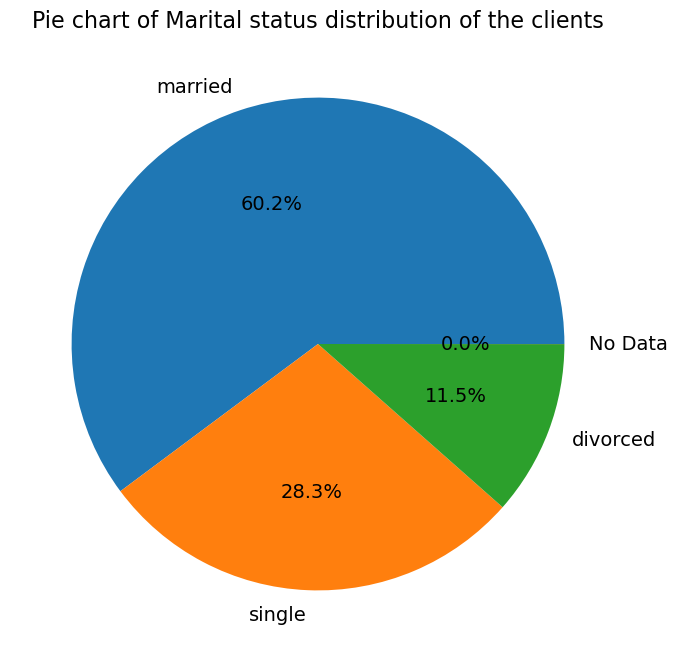

In [77]:
plt.figure(figsize=(12,8))
plt.pie(df1['marital_status'].value_counts().tolist(),labels=df1['marital_status'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie chart of Marital status distribution of the clients',fontsize=16)
plt.show()

In [78]:
df1['marital_status'].value_counts(sort=True).keys()

CategoricalIndex(['married', 'single', 'divorced', 'No Data'], categories=['No Data', 'divorced', 'married', 'single'], ordered=False, dtype='category', name='marital_status')

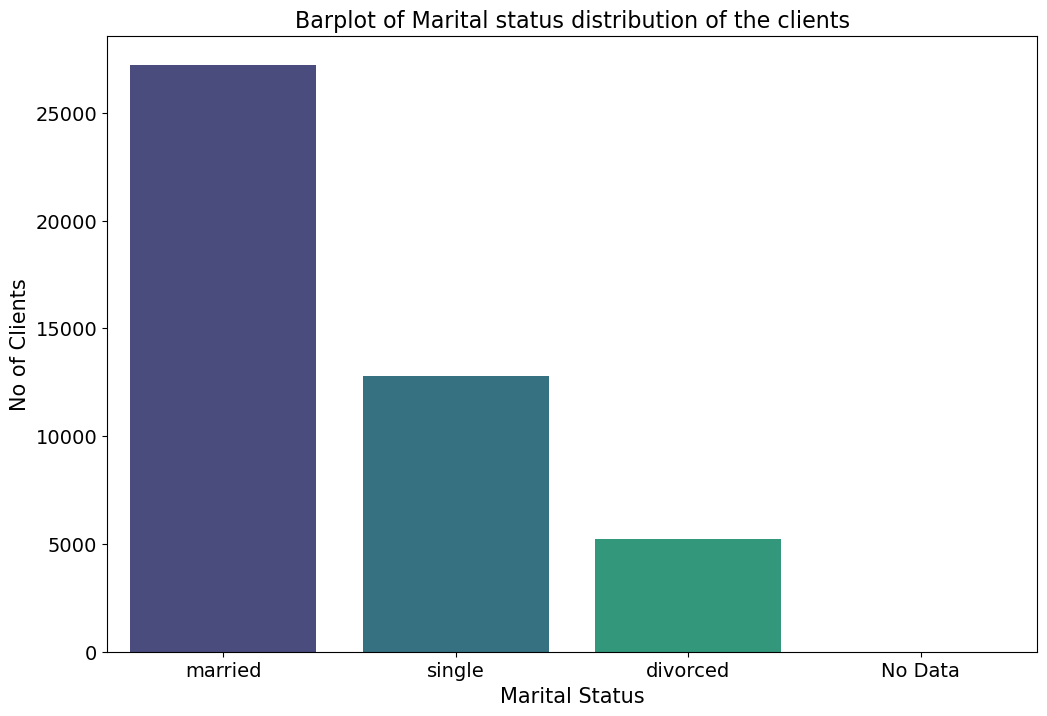

In [79]:
order = ['married', 'single', 'divorced', 'No Data']
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['marital_status'].value_counts(sort=True).keys(),y=df1['marital_status'].value_counts(sort=True).tolist(),order = order,palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Marital status distribution of the clients',fontsize=16)
plt.xlabel('Marital Status',fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusion:`

1. Majority of the clients(60.2%) are Married.

2. Single clients are the next most common group but are less than half the number of married clients.

3. Divorced clients represent a smaller fraction compared to the married and single clients.
   
4. There is a small category labeled "No Data", indicating that there are some clients for whom the marital status is not recorded.

## 4. Level of Education among clients

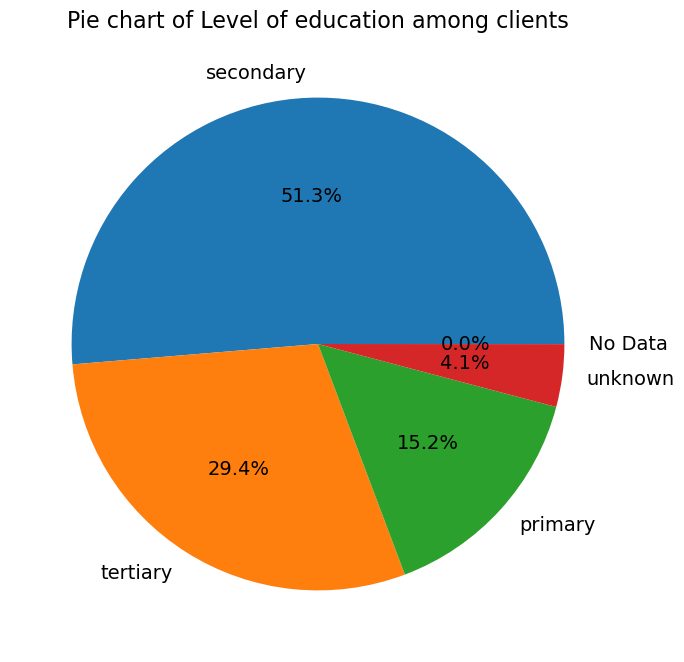

In [80]:
plt.figure(figsize=(12,8))
plt.pie(df1['education'].value_counts().tolist(),labels=df1['education'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie chart of Level of education among clients',fontsize=16)
plt.show()

In [81]:
df1['education'].value_counts(sort=True).keys()

CategoricalIndex(['secondary', 'tertiary', 'primary', 'unknown', 'No Data'], categories=['No Data', 'primary', 'secondary', 'tertiary', 'unknown'], ordered=False, dtype='category', name='education')

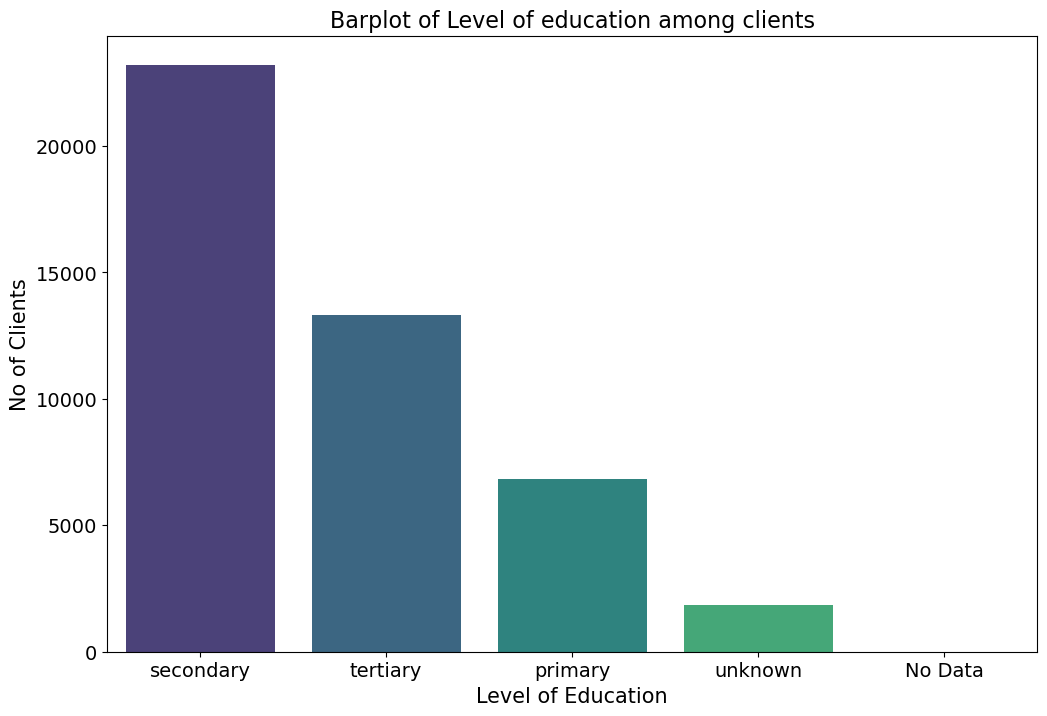

In [82]:
order = ['secondary', 'tertiary', 'primary', 'unknown', 'No Data']
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['education'].value_counts(sort=True).keys(),y=df1['education'].value_counts(sort=True).tolist(),order = order,palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Level of education among clients',fontsize=16)
plt.xlabel('Level of Education',fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

1. Majority of the clients(51.3%) have completed their secondary education.

2. The next substantial group consists of clients with tertiary education, indicating a significant number of clients with higher education.

3. Clients with primary education form a smaller proportion compared to the other two educational levels.

4. There is a category of clients for whom the level of education is unknown.

5. A small fraction of the data does not have education level information, indicated as "No Data".


## 5. Proportion of clients that have credit in default

In [83]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

In [84]:
df1['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

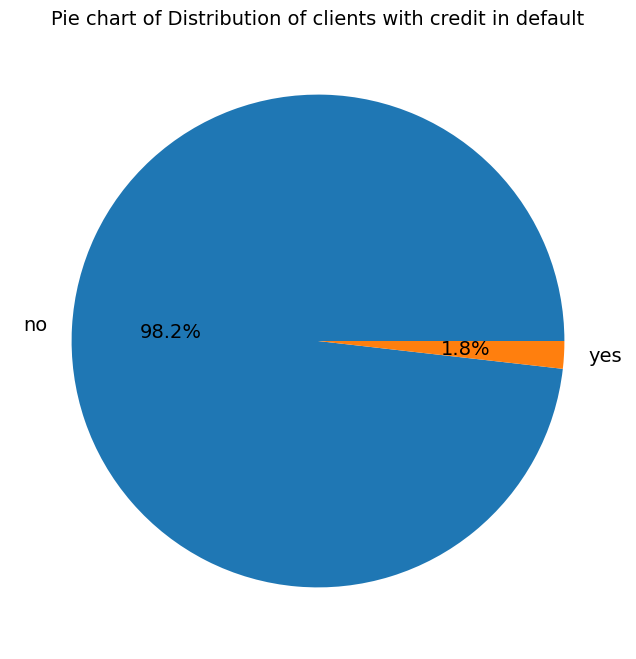

In [85]:
plt.figure(figsize=(12,8))
plt.pie(df1['default'].value_counts().tolist(),labels=df1['default'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie chart of Distribution of clients with credit in default',fontsize=14)
plt.show()

In [86]:
df1['default'].value_counts(sort=True).keys()

CategoricalIndex(['no', 'yes'], categories=['no', 'yes'], ordered=False, dtype='category', name='default')

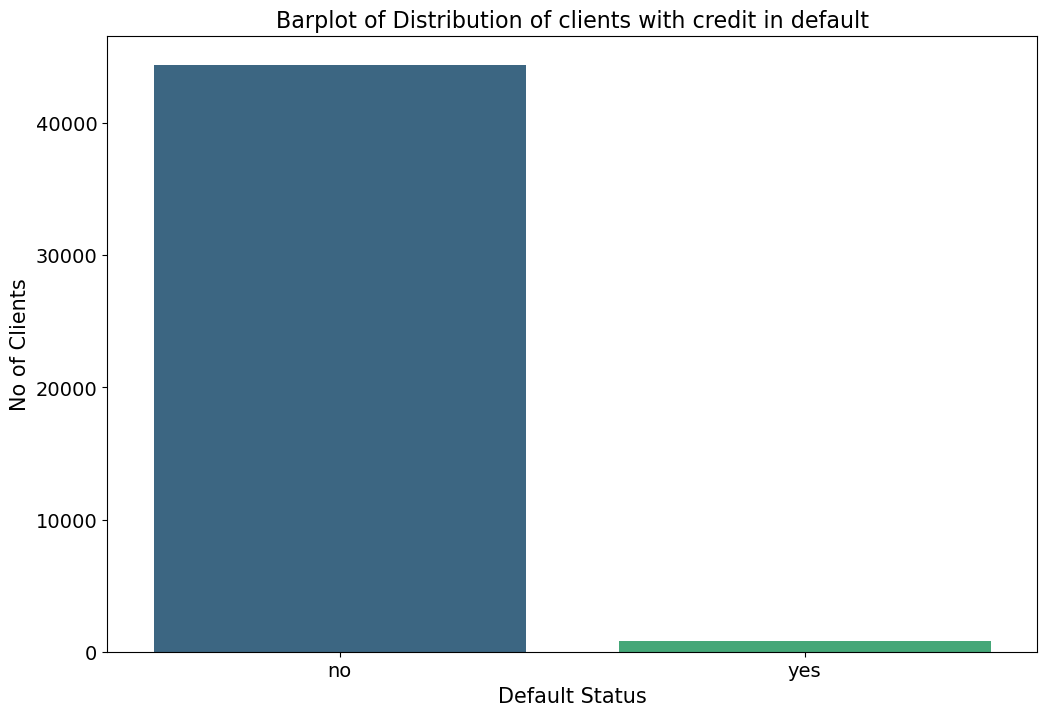

In [87]:
order = ['no', 'yes']
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['default'].value_counts(sort=True).keys(),y=df1['default'].value_counts(sort=True).tolist(),order = order,palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Distribution of clients with credit in default',fontsize=16)
plt.xlabel('Default Status',fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [88]:
df1[df1['default']=='yes'].shape[0]

815

`Conclusion:` 

1. Only 1.8%(815) of the clients have credit in default

## 6. Distribution of average yearly balance among clients

In [89]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

In [90]:
df1['balance'].info()

<class 'pandas.core.series.Series'>
Index: 45211 entries, 0 to 45210
Series name: balance
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 706.4 KB


In [91]:
df1['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

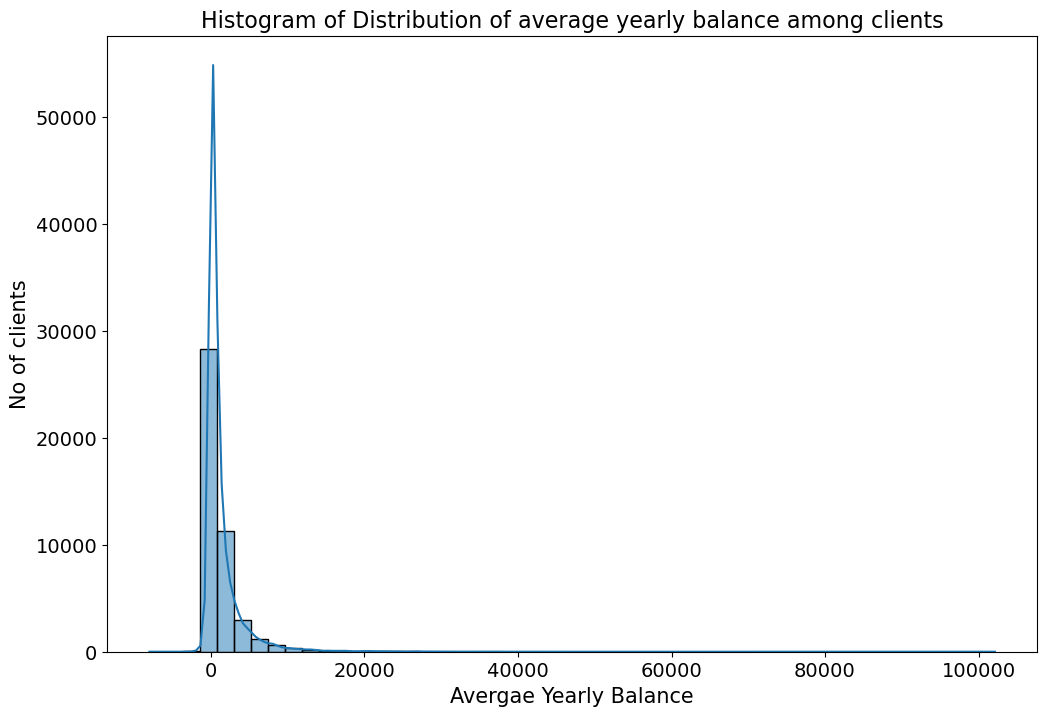

In [92]:
plt.figure(figsize=(12,8))
sns.histplot(df1['balance'],bins=50,kde=True)
plt.title('Histogram of Distribution of average yearly balance among clients',fontsize=16)
plt.xlabel('Avergae Yearly Balance',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

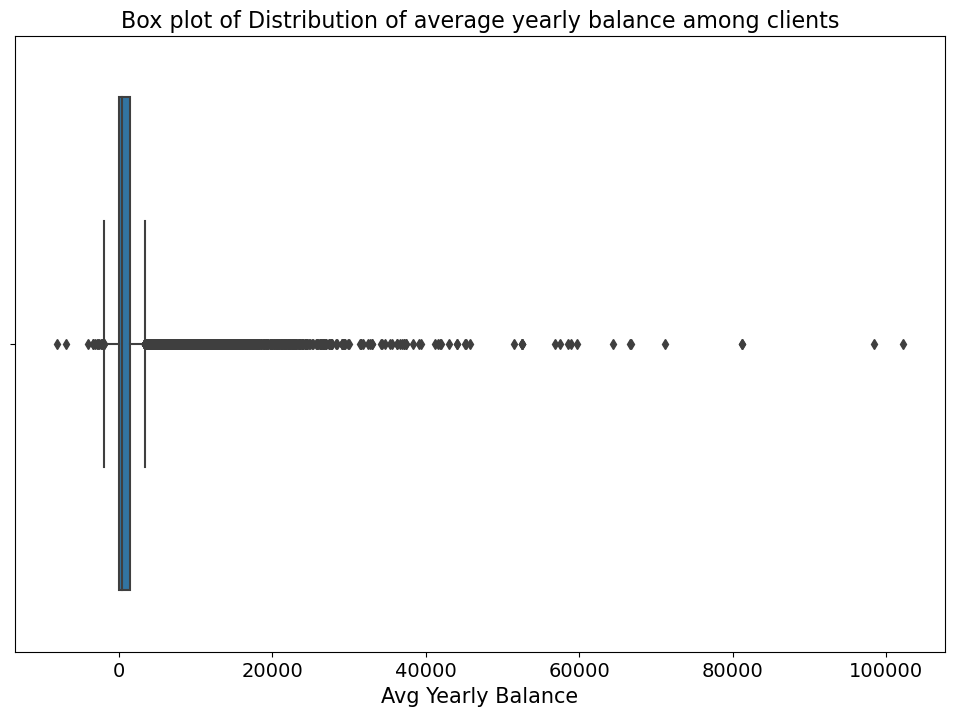

In [93]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,x='balance')
plt.title('Box plot of Distribution of average yearly balance among clients',fontsize=16)
plt.xlabel('Avg Yearly Balance',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

1. A large majority of clients have a relatively low average yearly balance, as indicated by the tall bar at the beginning of the histogram.

2. The frequency of clients decreases rapidly as the balance amount increases, suggesting that higher balances are much less common.

3. There are very few clients with an average yearly balance above 20,000 euros, indicating that high balances are rare within this client base.

4.  The distribution is right-skewed, with most clients clustered in the lower balance range and outliers with high balances.

5. Considering the shape of the distribution, the bank’s client base is likely comprised of individuals with modest means rather than high-net-worth individuals.

6. The median balance 448 which is relatively low, suggesting that the typical client does not have a large average yearly balance.


## 7. Clients with housing loans

In [94]:
df1['housing'].info()

<class 'pandas.core.series.Series'>
Index: 45211 entries, 0 to 45210
Series name: housing
Non-Null Count  Dtype   
--------------  -----   
45211 non-null  category
dtypes: category(1)
memory usage: 397.5 KB


In [95]:
df1['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

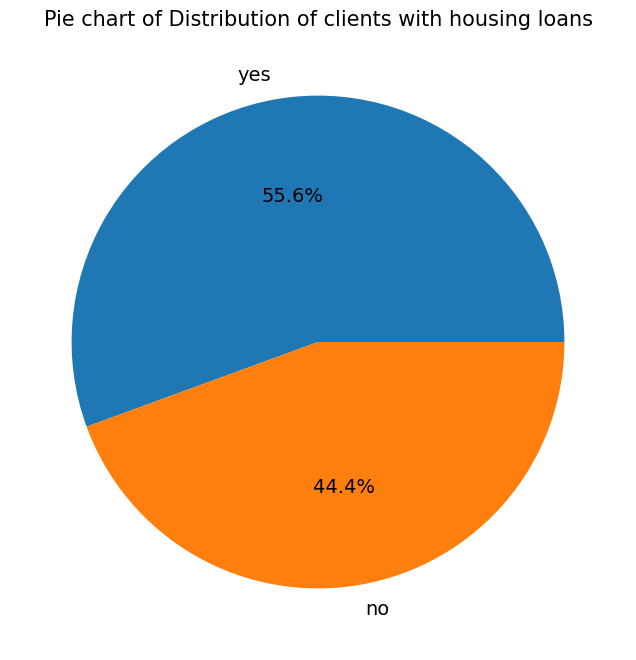

In [96]:
plt.figure(figsize=(12,8))
plt.pie(df1['housing'].value_counts().tolist(),labels=df1['housing'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie chart of Distribution of clients with housing loans',fontsize=15)
plt.show()

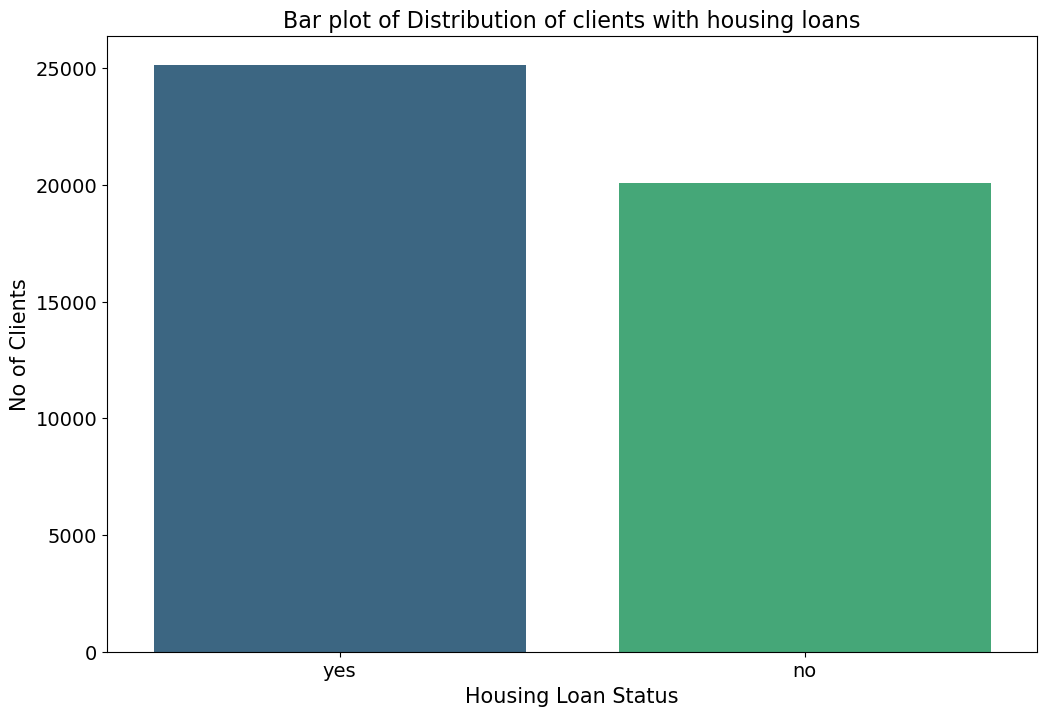

In [97]:
order = ['yes','no']
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['housing'].value_counts(sort=True).keys(),y=df1['housing'].value_counts(sort=True).tolist(),order=order,palette='viridis')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Bar plot of Distribution of clients with housing loans',fontsize=16)
plt.xlabel('Housing Loan Status',fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.show()

In [98]:
df1[df1['housing'] == 'yes'].shape[0]

25130

`Conclusion:` 

+ Majority of the clients (55.6%) have housing loans

## 8. Clients with personal loans

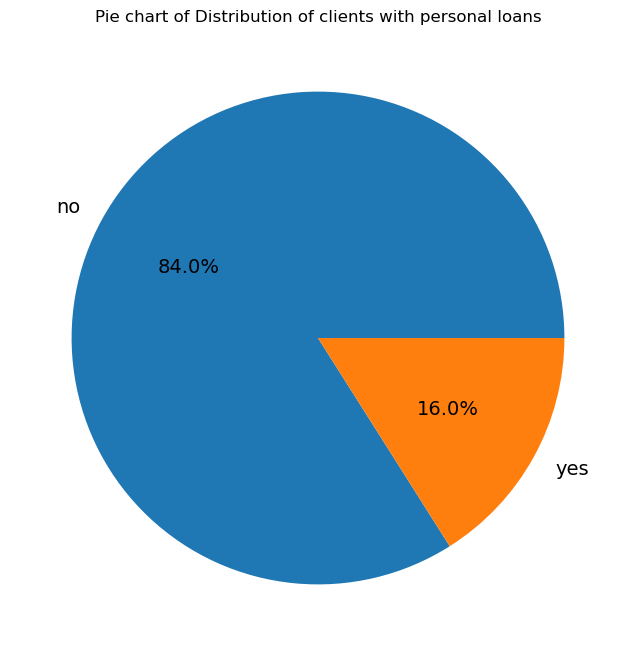

In [99]:
plt.figure(figsize=(12,8))
plt.pie(df1['loan'].value_counts().tolist(),labels=df1['loan'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie chart of Distribution of clients with personal loans')
plt.show()

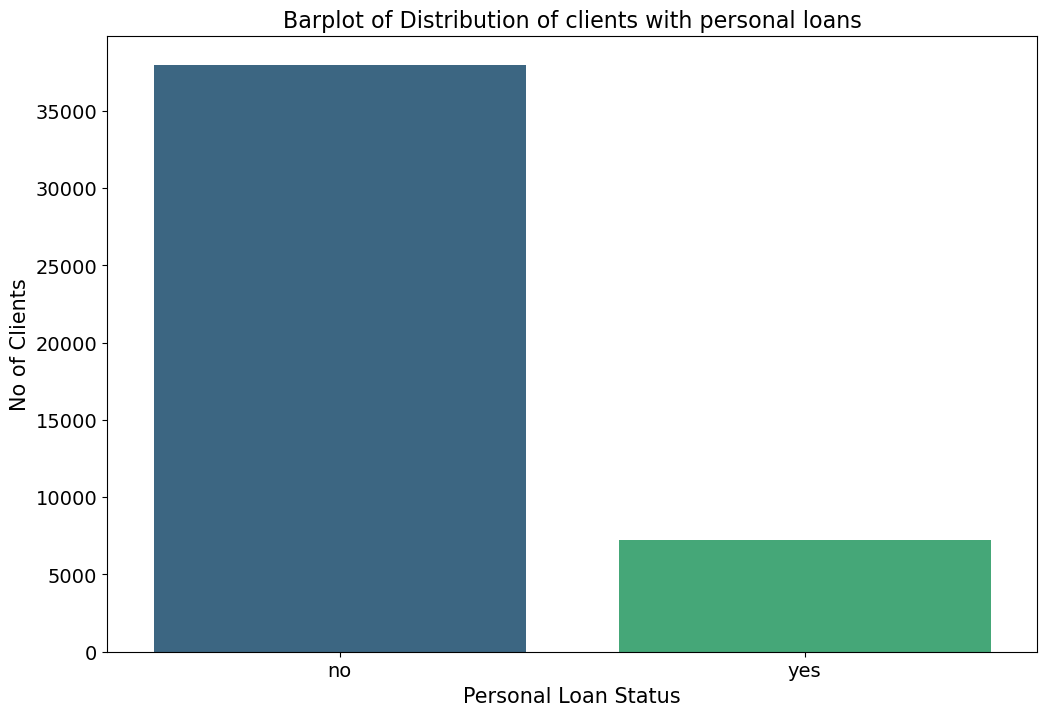

In [100]:
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['loan'].value_counts(sort=True).keys(),y=df1['loan'].value_counts(sort=True).tolist(),order=['no','yes'],palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Distribution of clients with personal loans',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Personal Loan Status",fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.show()

In [101]:
df1[df1['loan'] == 'no'].shape[0]

37967

`Conclusion:`

+ Majority of the clients (84%) of the clients don't have any personal loans

## 9. Communication types used for contacting clients during the campaign

In [102]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

In [103]:
df1['contact'].info()

<class 'pandas.core.series.Series'>
Index: 45211 entries, 0 to 45210
Series name: contact
Non-Null Count  Dtype   
--------------  -----   
45211 non-null  category
dtypes: category(1)
memory usage: 397.5 KB


In [104]:
df1['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

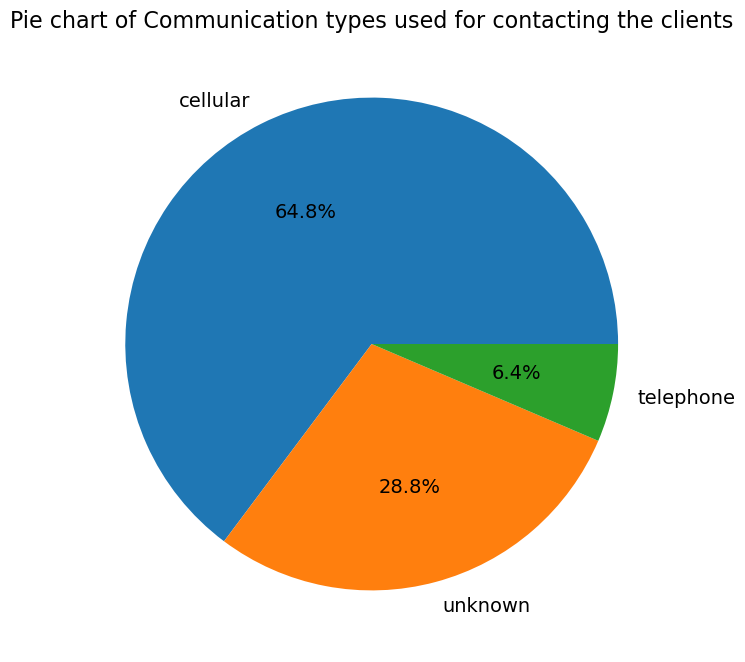

In [105]:
plt.figure(figsize=(12,8))
plt.pie(df1['contact'].value_counts().tolist(),labels=df1['contact'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie chart of Communication types used for contacting the clients',fontsize=16)
plt.show()

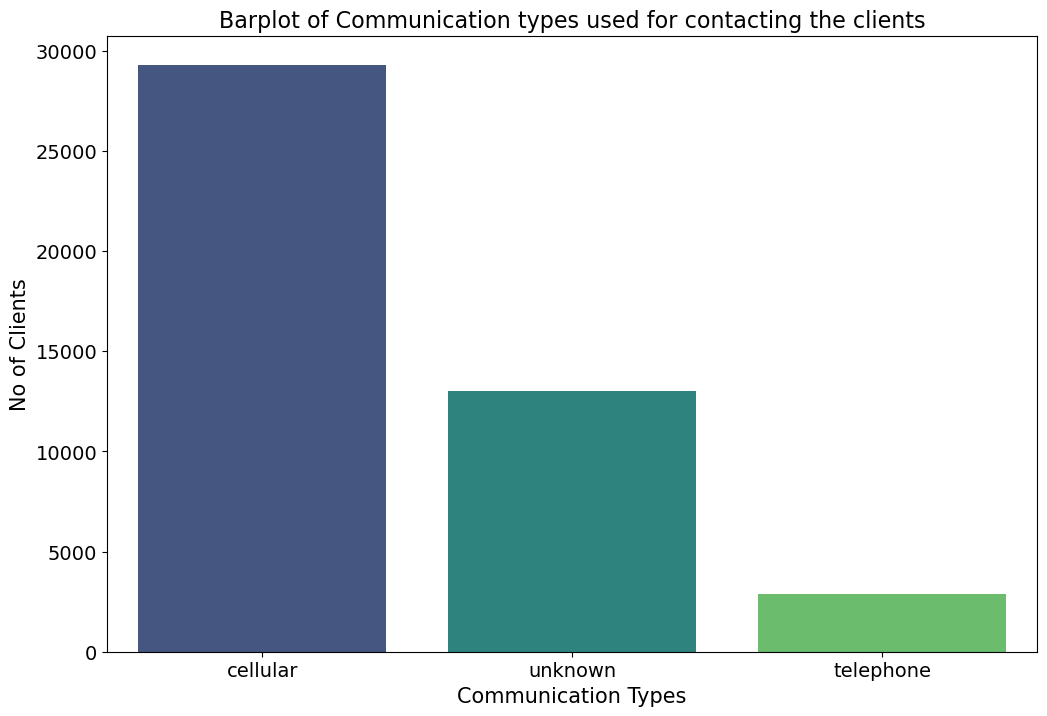

In [106]:
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['contact'].value_counts(sort=True).keys(),y=df1['contact'].value_counts(sort=True).tolist(),order=['cellular','unknown','telephone'],palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Communication types used for contacting the clients',fontsize=16)
plt.xlabel('Communication Types',fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

1. 64.8 % pf the clients were contacted using a cellular medium.

2. only 6.4 % of the clients were contacted using telephone.

3. A very large percentage of the clients (28.8%) were contacted using unknown means.

## 10. Distribution of the last contact day of the month

In [107]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

In [108]:
df1['date'].dt.day.skew()

0.09307901402122411

In [109]:
df1['date'].dt.day.value_counts(sort=True).keys()

Index([20, 18, 21, 17,  6,  5, 14,  8, 28,  7, 19, 29, 15, 12, 13, 30,  9, 11,
        4, 16,  2, 27,  3, 26, 23, 22, 25, 31, 10, 24,  1],
      dtype='int32', name='date')

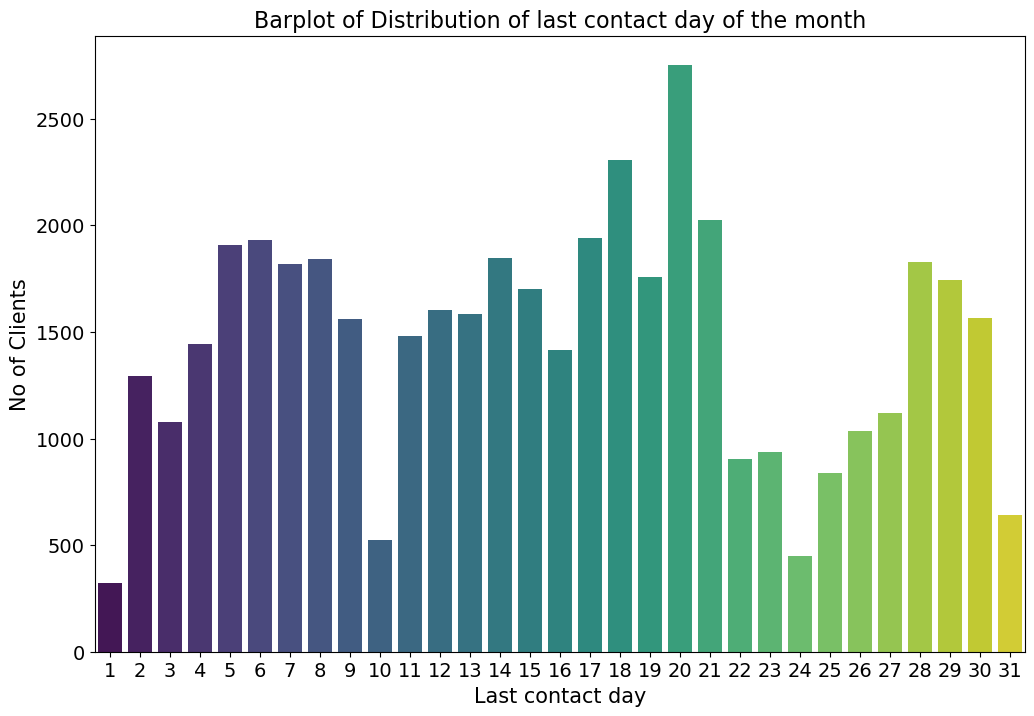

In [110]:
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['date'].dt.day.value_counts(sort=True).keys(),y=df1['date'].dt.day.value_counts(sort=True).tolist(),palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Distribution of last contact day of the month',fontsize=16)
plt.xlabel('Last contact day',fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [111]:
df1['date'].dt.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: date, dtype: float64

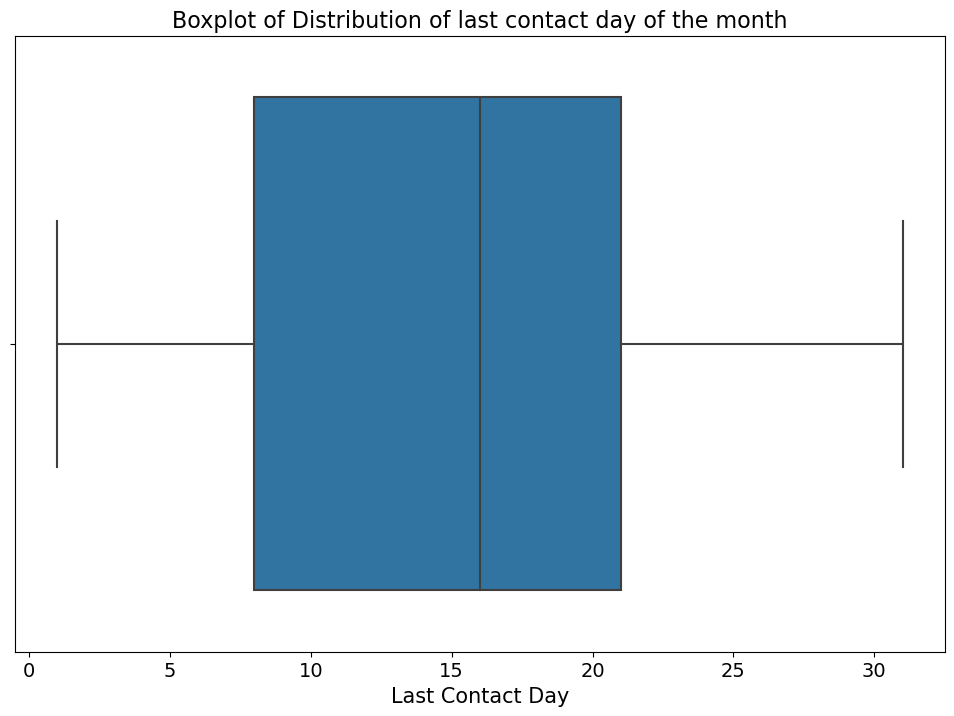

In [112]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,x=df1['date'].dt.day)
plt.title('Boxplot of Distribution of last contact day of the month',fontsize=16)
#plt.xlabel('Last contact day')
plt.xlabel('Last Contact Day',fontsize='15')
plt.xticks(fontsize=14)
plt.show()

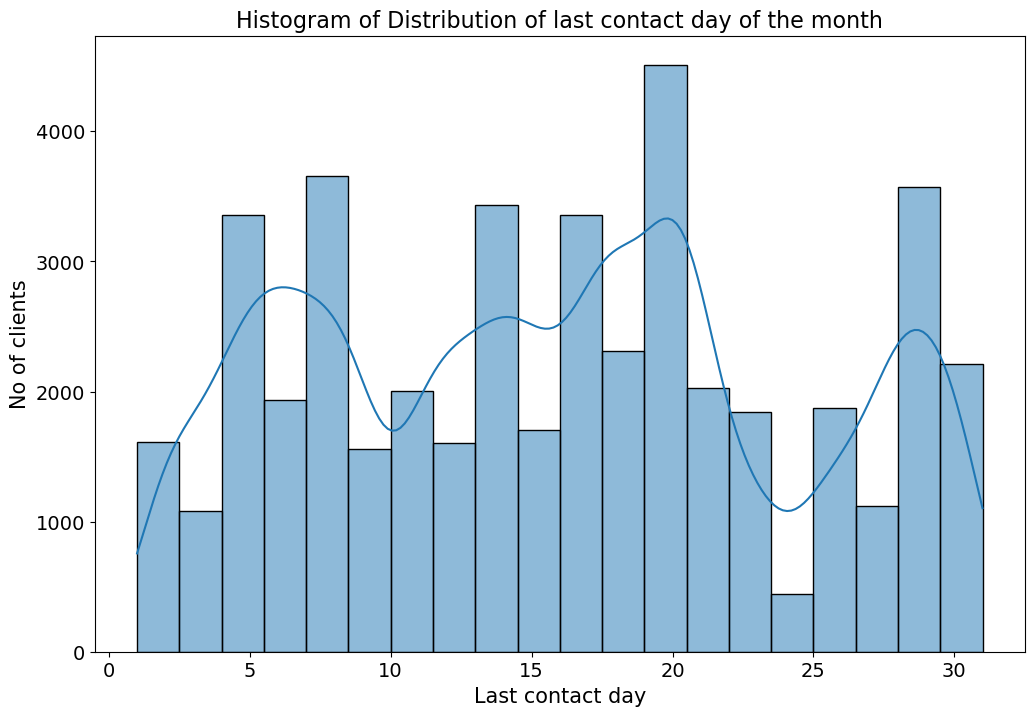

In [113]:
plt.figure(figsize=(12,8))
sns.histplot(df1['date'].dt.day,bins=20,kde=True)
plt.title('Histogram of Distribution of last contact day of the month',fontsize=16)
plt.xlabel('Last contact day',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusion:` 

1. The distribution of last contact days is not uniform across the month.

2. There is a significant peak around the middle of the month, specifically on day 20, indicating a higher frequency of client contacts on that day.

3. The beginning and the end of the month show lower frequencies of contact.

4. Notably, the 31st has the lowest frequency, which could be due to fewer months having this date.

5. Days 1 and 10 also exhibit lower activity compared to their neighboring days.

## 11. Variation of last contact month among clients

In [114]:
df1['date'].dt.month_name().value_counts()

date
May          13766
July          6895
August        6247
June          5341
November      3970
April         2932
February      2649
January       1403
October        738
September      579
March          477
December       214
Name: count, dtype: int64

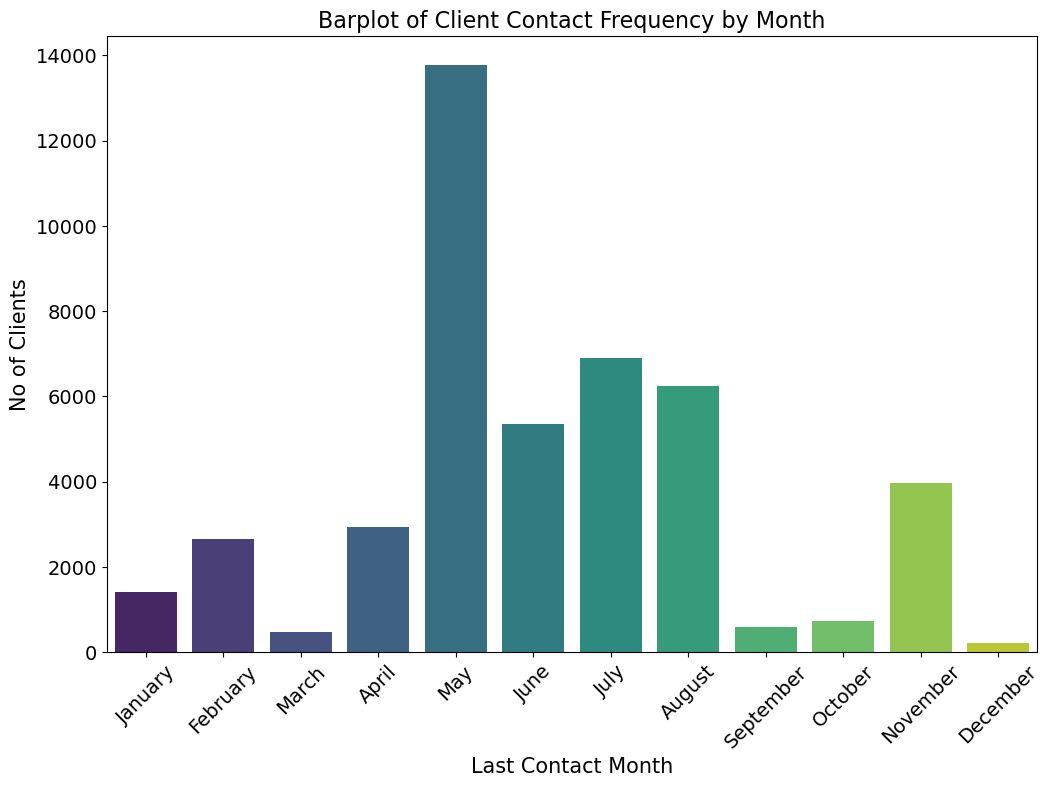

In [115]:
order = ['January','February','March','April','May','June','July','August','September','October','November',"December"]
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['date'].dt.month_name().value_counts().keys(),y=df1['date'].dt.month_name().value_counts().tolist(),order = order,palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Client Contact Frequency by Month',fontsize=16)
plt.xlabel('Last Contact Month',fontsize=15)
plt.ylabel('No of Clients',fontsize=15)
plt.xticks(rotation = 45,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:` 

1. The contact frequency is significantly higher in May than in any other month, suggesting that this is a peak period for the marketing campaign.

2. The lowest contact frequencies are observed in the months of January, February, and December, indicating a possible seasonal downturn in marketing activities.

3. The months of June, July, August, and November show a moderate level of contact frequency.

4. There's a notable drop in contact frequency after May, with the numbers gradually increasing again towards August, followed by a decrease towards the end of the year.

## 12. Distribution of duration of last contact

In [116]:
df1['duration'].info()

<class 'pandas.core.series.Series'>
Index: 45211 entries, 0 to 45210
Series name: duration
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 706.4 KB


In [117]:
df1['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

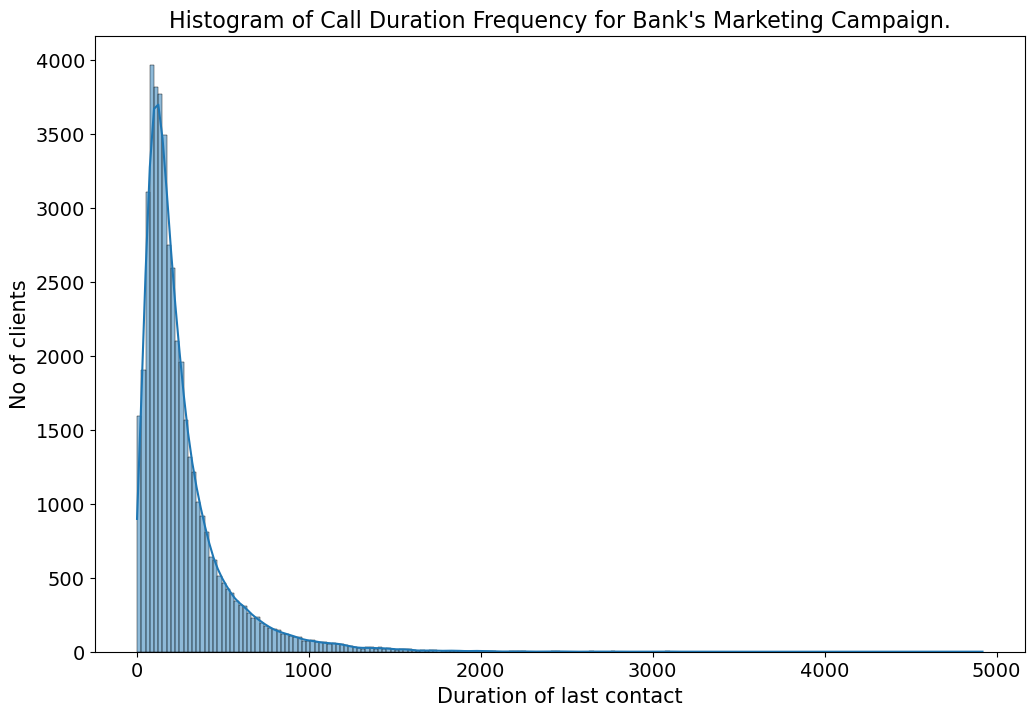

In [118]:
plt.figure(figsize=(12,8))
sns.histplot(df1['duration'],bins=200,kde=True)
plt.title("Histogram of Call Duration Frequency for Bank's Marketing Campaign.",fontsize=16)
plt.xlabel('Duration of last contact',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

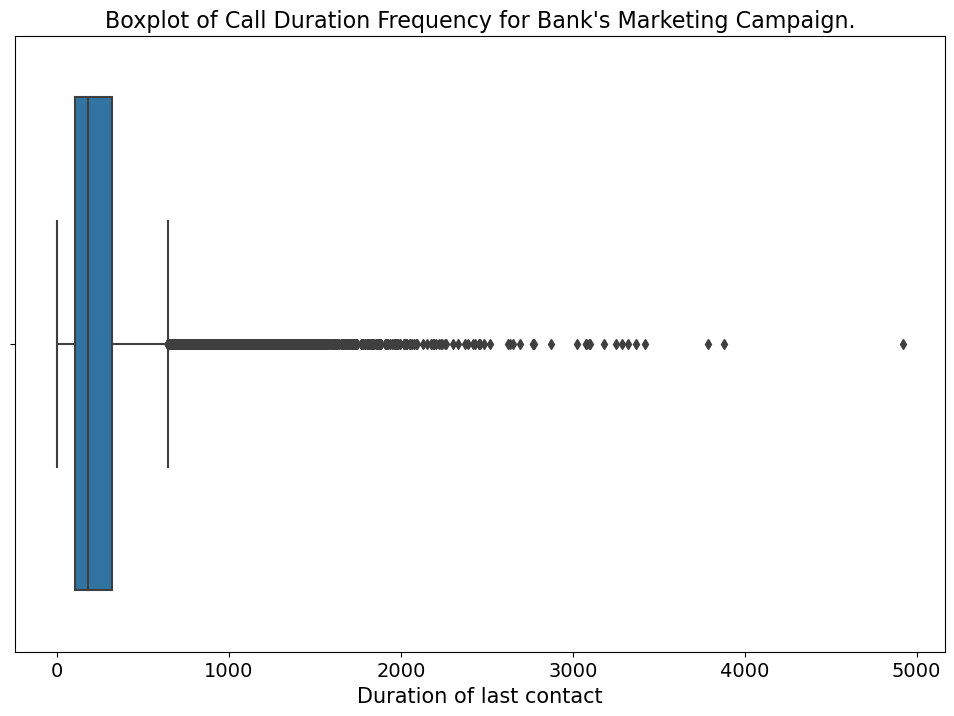

In [119]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,x='duration')
plt.title("Boxplot of Call Duration Frequency for Bank's Marketing Campaign.",fontsize=16)
plt.xlabel('Duration of last contact',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [120]:
df1['duration'].skew()

3.144318099423456

`Conclusions:` 

1. The mean call duration is 258s.

2. The distribution is heavily right-skewed, indicating that most calls were relatively short, with a steep decrease in frequency as call duration increases.

3. There is a high frequency of very short calls, with the number of calls declining rapidly as the duration lengthens.

4. Very few calls had a very long duration, which suggests that extended conversations were rare in this campaign.

5. The vast majority of contacts were brief, possibly underlining the efficiency of the call center or a focus on quick interactions.

6. The pattern might indicate that the standard call was meant to be brief, with only specific circumstances leading to longer discussions.

## 13. No of contact performed during the campaign for each client

In [121]:
df1.columns

Index(['index', 'age', 'job', 'marital_status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'date', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'year'],
      dtype='object')

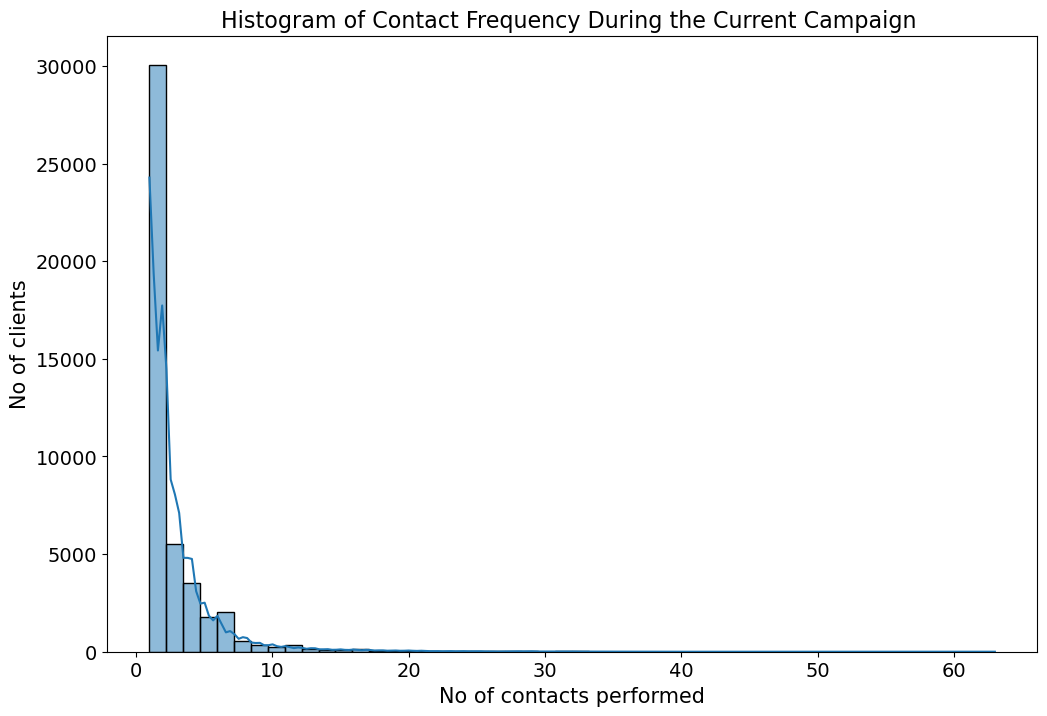

In [122]:
plt.figure(figsize=(12,8))
sns.histplot(df1['campaign'],bins=50,kde=True)
plt.title('Histogram of Contact Frequency During the Current Campaign ',fontsize=16)
plt.xlabel('No of contacts performed',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

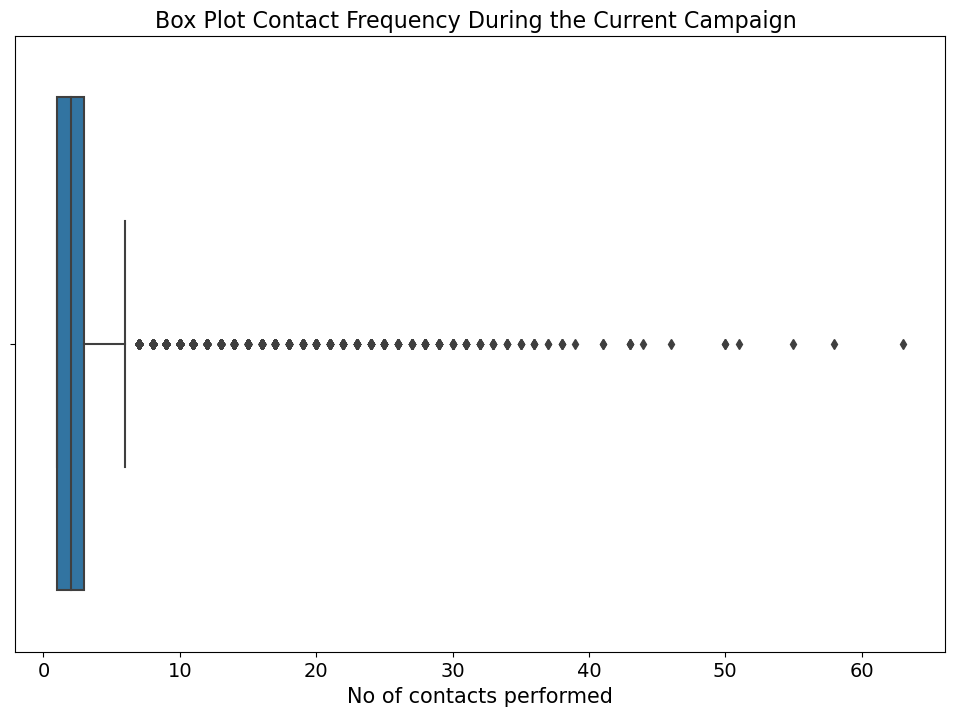

In [123]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,x='campaign')
plt.title('Box Plot Contact Frequency During the Current Campaign ',fontsize=16)
plt.xlabel('No of contacts performed',fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [124]:
df1['campaign'].skew()

4.898650166179674

In [125]:
df1[df1['campaign'] < 5].shape[0]/df1.shape[0]

0.8646568313021168

`Conclusions:` 

1. The data is highly positively skewed.

2. The vast majority of clients were contacted a few times, with a sharp decrease in the number of clients as the number of contacts increases.

3. The highest proportion of clients(86.46%) received less than 5 contacts during the campaign.

4. A very small number of clients were contacted more than 20 times, which indicates that such extensive contact is very rare.

5. The distribution of contacts is extremely skewed to the right, suggesting that the campaign strategy primarily focused on a lower number of contacts per client.

6. There is a notable number of outliers where clients were contacted many more times than the median.

## 14. Distribution of the number of days passed since the client was last contacted from a previous campaign

In [126]:
df1['pdays'].info()

<class 'pandas.core.series.Series'>
Index: 45211 entries, 0 to 45210
Series name: pdays
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 706.4 KB


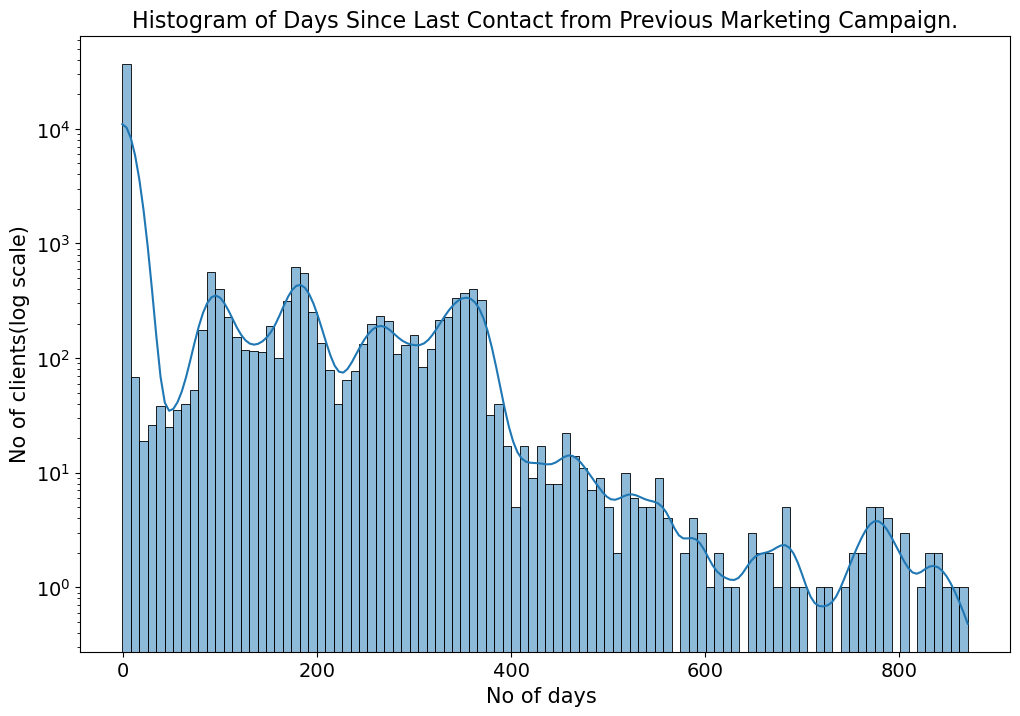

In [127]:
plt.figure(figsize=(12,8))
sns.histplot(df1['pdays'],bins=100,kde=True)
plt.title('Histogram of Days Since Last Contact from Previous Marketing Campaign.',fontsize=16)
plt.xlabel('No of days ',fontsize=15)
plt.ylabel('No of clients(log scale)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.show()

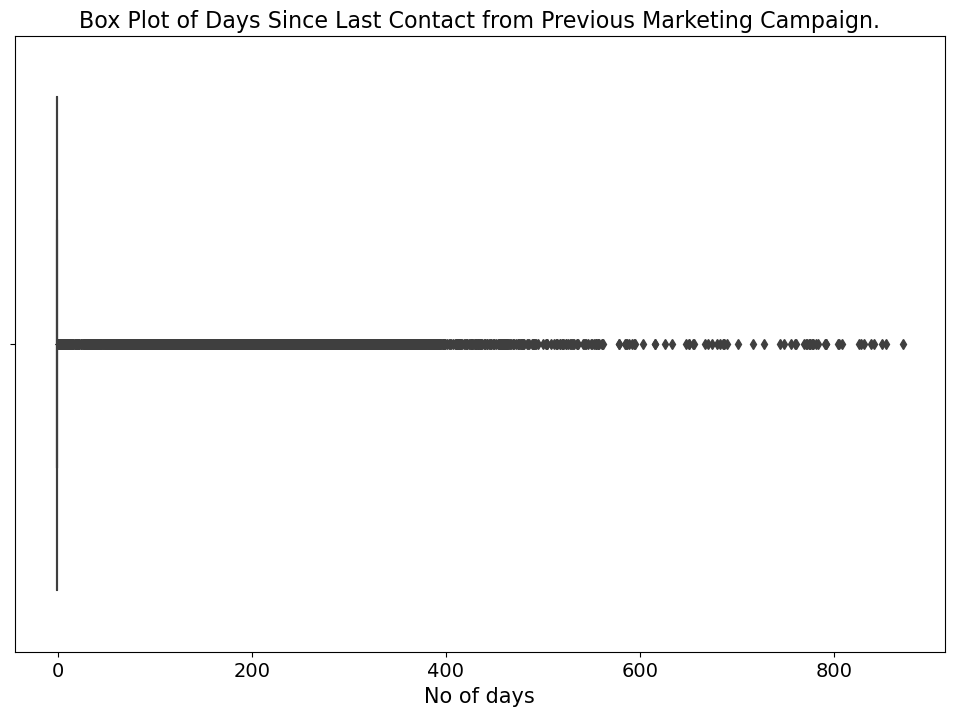

In [128]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,x='pdays')
plt.title('Box Plot of Days Since Last Contact from Previous Marketing Campaign.',fontsize=16)
plt.xlabel('No of days',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [129]:
df1['pdays'].skew()

2.6157154736563477

In [130]:
df1[df1['pdays']==-1].shape[0]/df1.shape[0]

0.8173674548229414

`Conclusions:` 

1. Most of the clients(81.73%) have never been contacted before.

2. The data is highly positively skewed.

3. There are relatively few clients who have been contacted after a gap, with the number decreasing sharply as the number of days increases.

4. There is a very long tail to the distribution, indicating that while most recent contacts are quite recent, there are some clients who haven't been contacted for a very long time.

5. The presence of outliers indicates that there are exceptions where clients had not been contacted for a long period before the current campaign.

6. There is a sharp peak at or near zero, indicating that a significant number of clients were contacted recently or not at all since the previous campaign.

7. There are some minor peaks later on, suggesting there might be specific times when re-contacting efforts were concentrated.

8. Overall, the distribution is skewed to the right, reinforcing the idea that most re-contacting efforts occur after a shorter interval or that many clients are new and have not been contacted before the current campaign.

## 15. No of contacts that were performed before the current campaign for each client

In [131]:
df1['previous'].value_counts().shape[0]

41

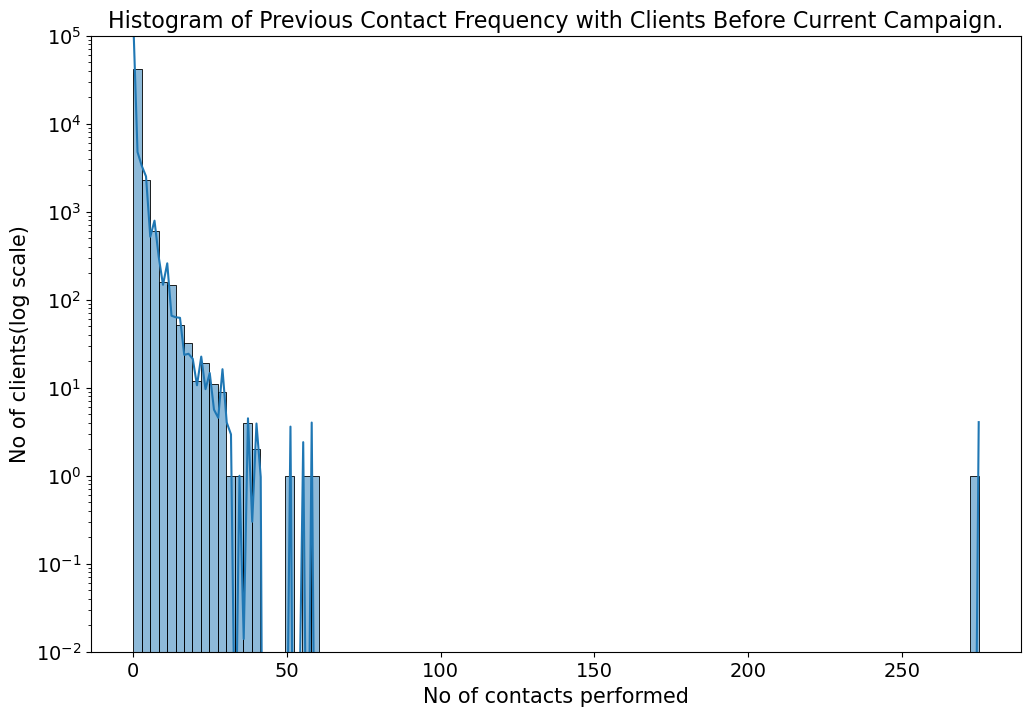

In [132]:
plt.figure(figsize=(12,8))
sns.histplot(df1['previous'],bins=100,kde=True)
plt.title('Histogram of Previous Contact Frequency with Clients Before Current Campaign.',fontsize=16)
plt.xlabel('No of contacts performed',fontsize=15)
plt.ylabel('No of clients(log scale)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim((0,100))
plt.yscale("log")
plt.ylim(bottom=0.01,top=1e5)
plt.show()

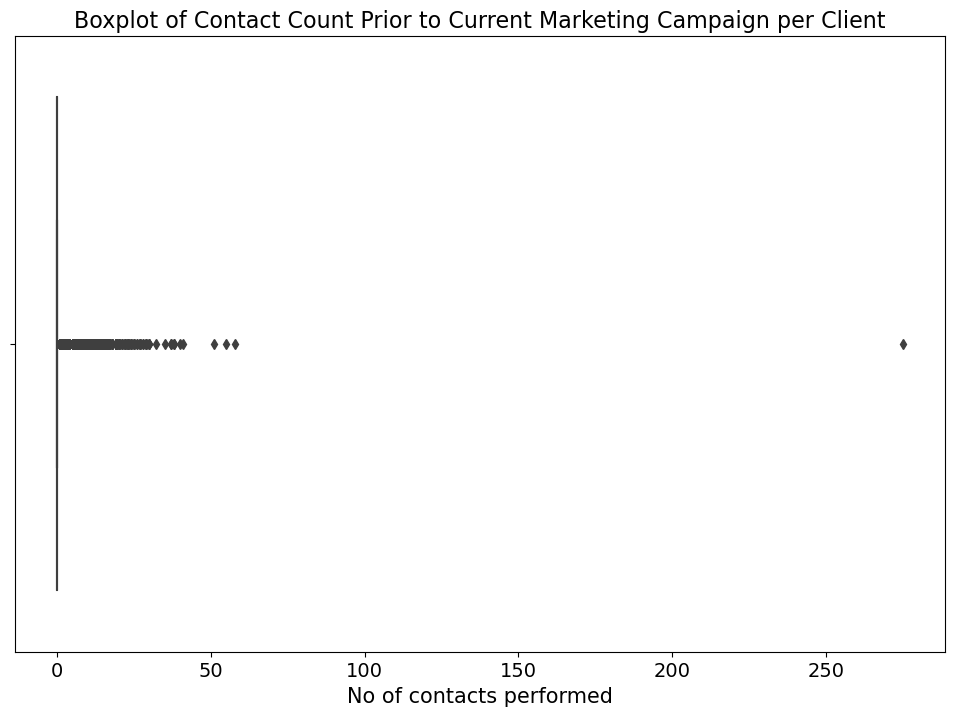

In [133]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,x='previous')
plt.title('Boxplot of Contact Count Prior to Current Marketing Campaign per Client',fontsize = 16)
plt.xlabel('No of contacts performed',fontsize=15)
plt.xticks(fontsize=14)
plt.show()

In [134]:
df1[df1['previous']==0].shape[0]/df1.shape[0]

0.8173674548229414

In [135]:
df1['previous'].skew()

41.84645447266292

`Conclusions:` 

1. The data is highle positively skewed.

2. The overwhelming majority of clients(81.73%) had zero contacts before the current campaign, suggesting a large number of new engagements or a policy of minimal prior contact.

3. There is a steep drop-off in frequency as the number of previous contacts increases, indicating that repeated outreach to the same clients was relatively uncommon.

4. Very few clients had a high number of contacts, as evidenced by the long tail that extends to the right, which implies that only a select few clients were contacted repeatedly.

5. The distribution is highly right-skewed, meaning that the bank's contact strategy might be focused more on acquiring new clients or those with less prior interaction.

6. Overall, the bank’s outreach strategy likely prioritizes new engagements over repeated contacts with the same clients.

7. There are a significant number of outliers, implying that while most clients had minimal contact, a few had a much higher number of contacts.

## 16. Outcomes of the previous marketing campaigns

In [136]:
df1['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

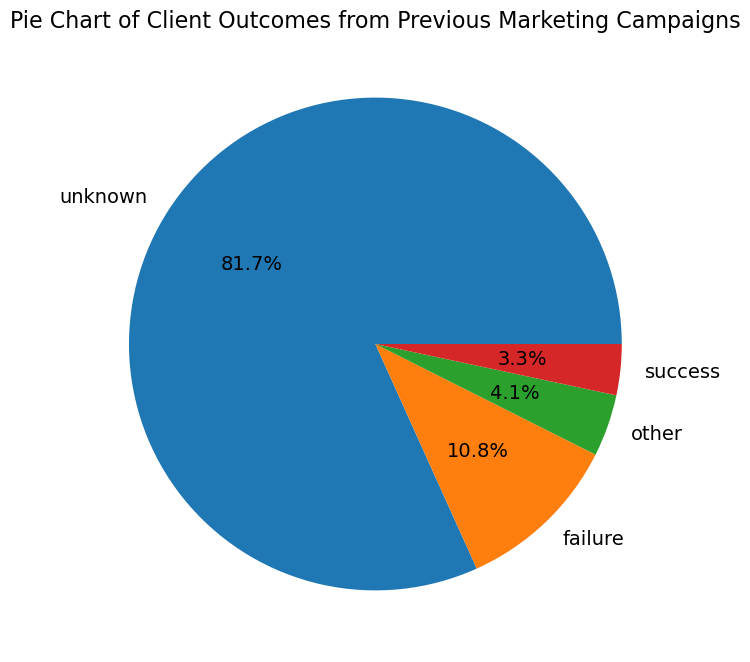

In [137]:
plt.figure(figsize=(12,8))
plt.pie(df1['poutcome'].value_counts().tolist(),labels=df1['poutcome'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie Chart of Client Outcomes from Previous Marketing Campaigns',fontsize=16)
plt.show()

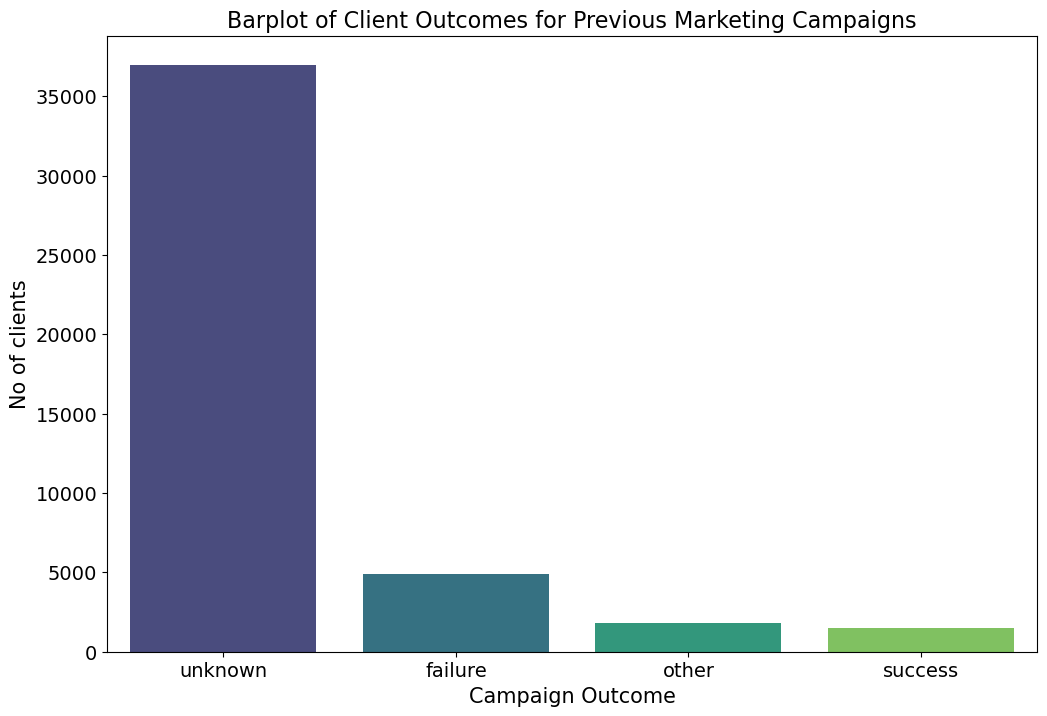

In [138]:
order = ['unknown','failure','other','success']
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['poutcome'].value_counts(sort=True).keys(),y=df1['poutcome'].value_counts(sort=True).tolist(),order = order,palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Client Outcomes for Previous Marketing Campaigns',fontsize=16)
plt.xlabel('Campaign Outcome',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:` 

1. The vast majority of the previous campaign outcomes are unknown, which comprises 81.7% of the total, indicating a lack of data on past client engagement or response.

2. Only a small fraction of clients have a known outcome from previous campaigns, with 10.8% labeled as failures and 3.3% as successes.

3. An even smaller segment, 4.1%, is categorized as other, which might include outcomes that are neither clearly successful nor outright failures.

4. This distribution suggests that there is a significant opportunity for the bank to improve its tracking and analysis of campaign outcomes to better understand client behaviors and patterns.

## 17. Distribution of clients who subscribed to a term deposit vs. those who did not

In [139]:
df1['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

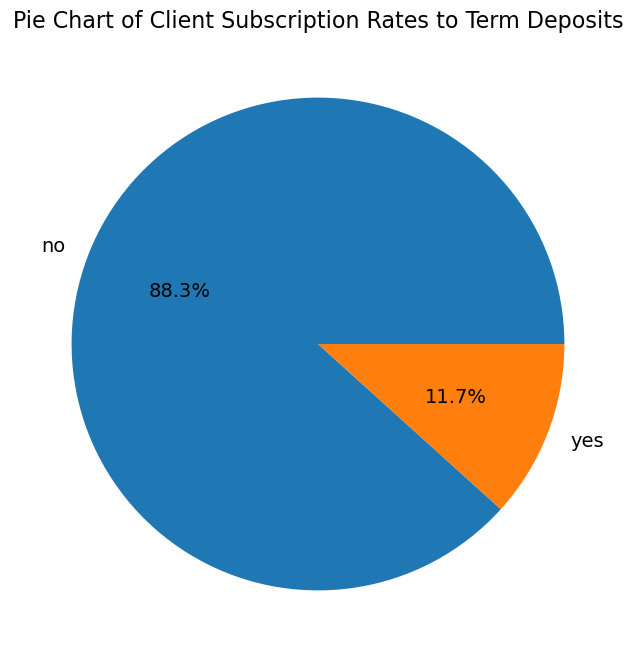

In [140]:
plt.figure(figsize=(12,8))
plt.pie(df1['y'].value_counts().tolist(),labels=df1['y'].value_counts().keys(),autopct='%0.1f%%',textprops={'fontsize': 14})
plt.title('Pie Chart of Client Subscription Rates to Term Deposits',fontsize=16)
plt.show()

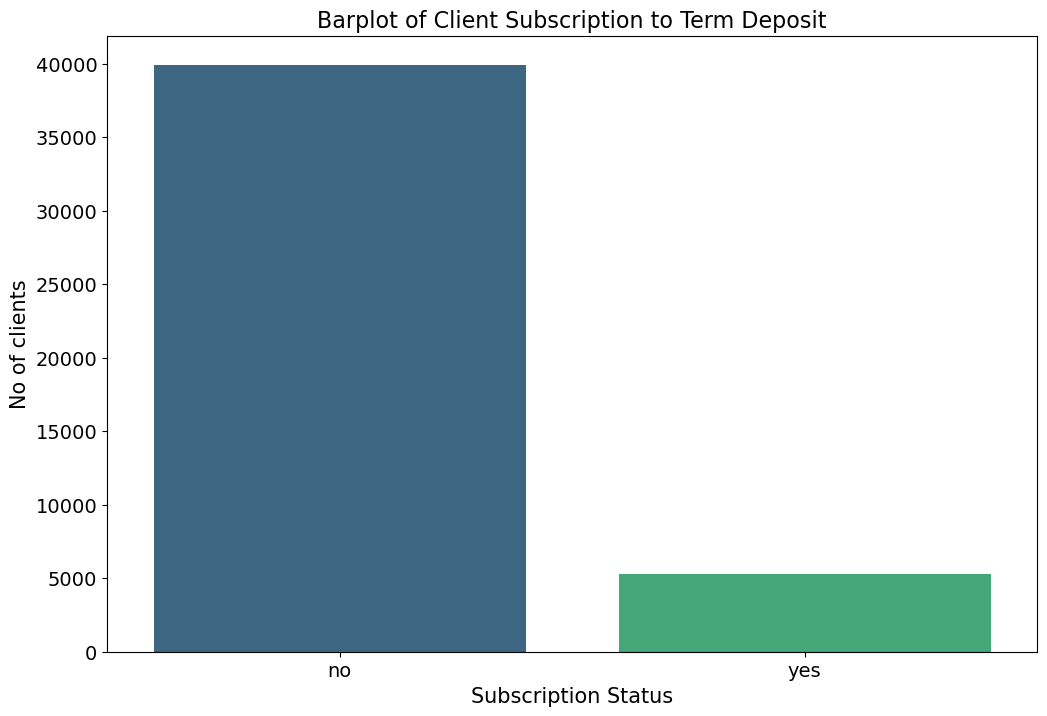

In [141]:
order = ['no','yes']
plt.figure(figsize=(12,8))
sns.barplot(data=df1,x=df1['y'].value_counts(sort=True).keys(),y=df1['y'].value_counts(sort=True).tolist(),order = order,palette='viridis')
#plt.xticks(rotation=45)
plt.title('Barplot of Client Subscription to Term Deposit',fontsize=16)
plt.xlabel('Subscription Status',fontsize=15)
plt.ylabel('No of clients',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

1. A significant majority, 88.3%, of clients did not subscribe to a term deposit, indicating a relatively low conversion rate for the campaign.

2. The minority, 11.7%, represents the clients who did subscribe, highlighting the successful conversions.

3. The large disparity between subscribers and non-subscribers suggests room for improvement in targeting or product offering to increase the subscription rate.

4. Strategies to convert the large segment of non-subscribers could include personalized follow-ups, tailored financial products, or incentives.

## 18. Correlations between different attributes and the likelihood of subscribing to a term deposit

### a) age vs y

In [142]:
df1.groupby('age')['y'].value_counts().sort_index()

age  y  
18   no      5
     yes     7
19   no     24
     yes    11
20   no     35
            ..
93   yes     2
94   no      1
     yes     0
95   no      1
     yes     1
Name: count, Length: 154, dtype: int64

In [143]:
# y-> no of yes values in increasing age order

In [144]:
df1['age'].value_counts().keys().sort_values()

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 92, 93, 94, 95],
      dtype='int64', name='age')

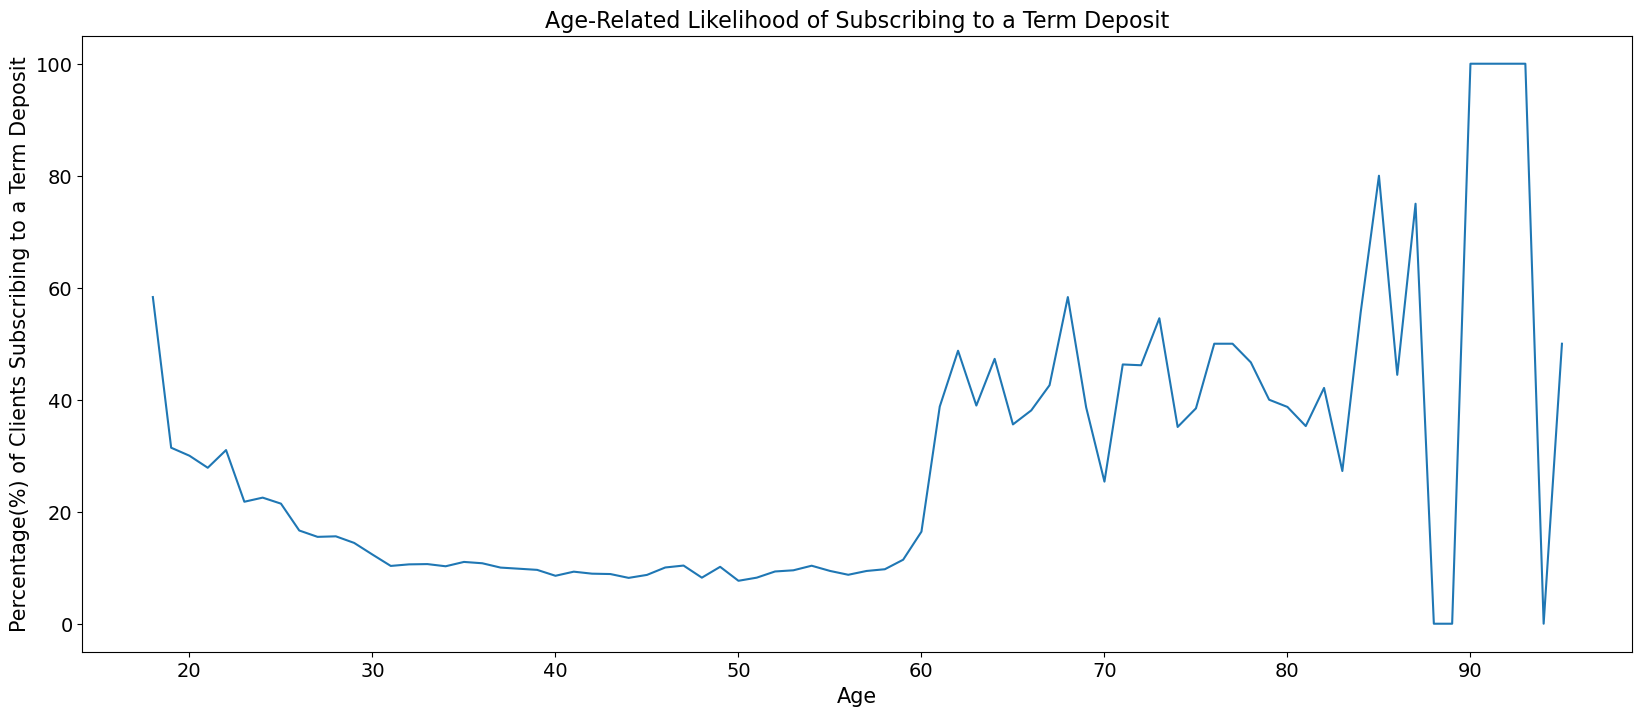

In [145]:
x = df1.groupby('age')['y'].value_counts().sort_index().tolist()
ages = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 92, 93, 94, 95]
y=[]
for i in range (1,78):
    y.append(x[2*i-1])
plt.figure(figsize=(20,8))
plt.title('Age-Related Likelihood of Subscribing to a Term Deposit',fontsize=16)
sns.lineplot(y/df1.groupby('age').count()['y']*100)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ Younger clients, particularly those in the 18 to 30 age range, show a lower likelihood of subscribing to a term deposit, which could indicate differing financial priorities or a lack of targeted marketing.

+ There is a general increase in subscription rates among clients as age increases, particularly noticeable in clients aged 60 and above.

+ The highest percentages of subscription are found in the oldest age brackets, suggesting that term deposits might be more appealing to clients as they approach or are in retirement, possibly due to a greater focus on savings and lower-risk financial products.

+ The graph indicates an opportunity to tailor financial advice and product offerings to specific age groups, enhancing the appeal to younger clients while maintaining engagement with older clients.

+ Marketing strategies could benefit from a segmented approach that addresses the financial needs and behaviors associated with different life stages.

### b) job vs y

In [146]:
df1.groupby('job')['y'].value_counts().sort_index()

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: count, dtype: int64

In [147]:
df1['job'].cat.categories

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

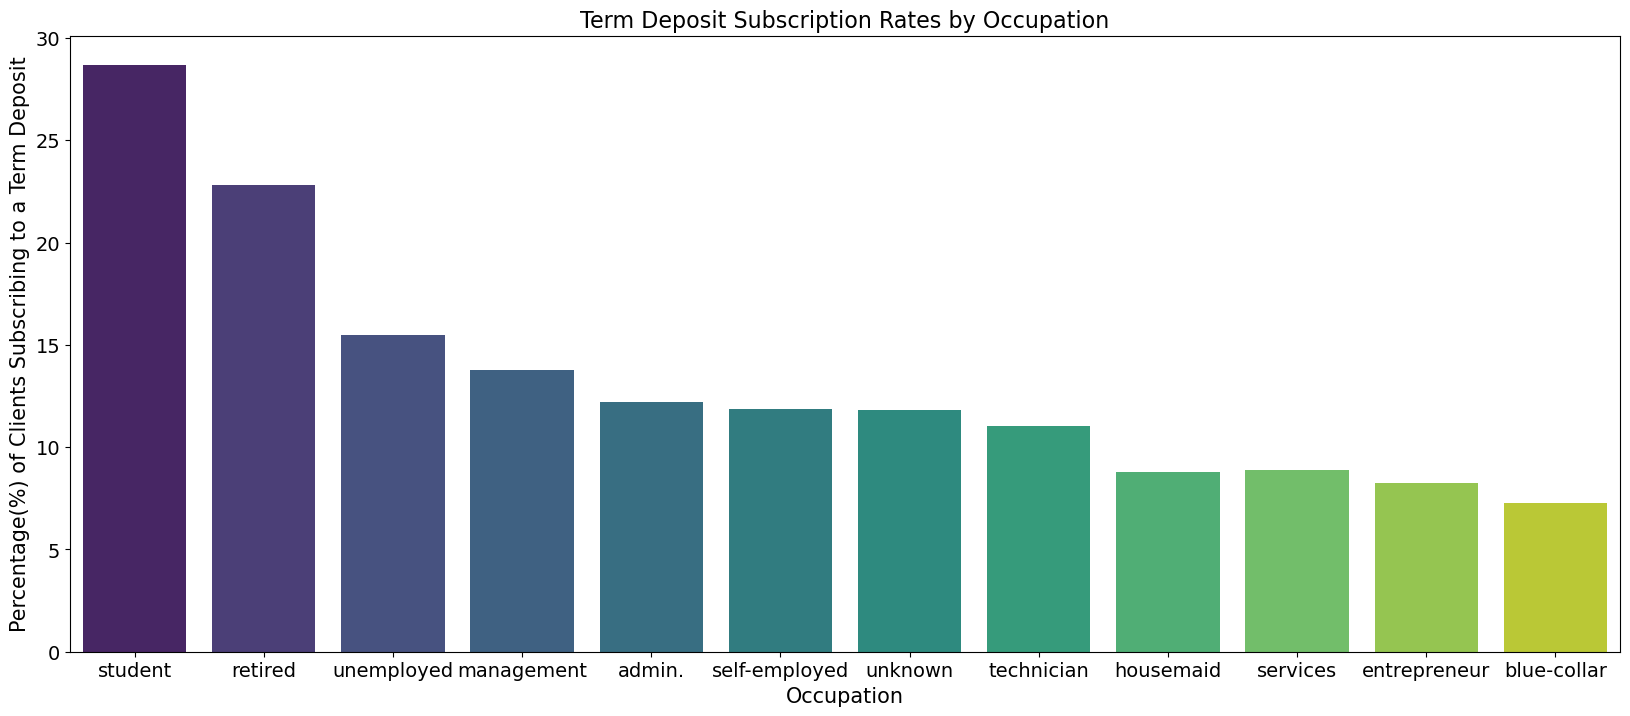

In [148]:
x = df1.groupby('job')['y'].value_counts().sort_index().tolist()
jobs=['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown']
y=[]
for i in range (1,13):
    y.append(x[2*i-1])
order = ['student','retired','unemployed','management','admin.','self-employed','unknown','technician','housemaid','services','entrepreneur','blue-collar']
plt.figure(figsize=(20,8))
plt.title('Term Deposit Subscription Rates by Occupation',fontsize=16)
sns.barplot(data = df1,x=jobs,y=y/df1.groupby('job').count()['y']*100,palette='viridis',order = order)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ Retirement seems to significantly increase the likelihood of subscribing to a term deposit, which is likely due to the need for low-risk investments during this life stage.

+ Students also show a high likelihood of subscription, possibly indicating good financial awareness or the effect of targeted student banking products.

+ Blue-collar workers and entrepreneurs have lower subscription rates, which might suggest a different financial priority or risk preference.

+ The 'unknown' category has a moderate subscription rate, indicating a potential area for further data collection to better understand this group.

+ Focused financial products and marketing tailored to the needs and financial behaviors of each occupation could improve subscription rates.

In [ ]:
### c) marital_status vs y

In [149]:
df1.groupby('marital_status')['y'].value_counts().sort_index()

marital_status  y  
No Data         no         3
                yes        0
divorced        no      4584
                yes      622
married         no     24458
                yes     2755
single          no     10877
                yes     1912
Name: count, dtype: int64

In [150]:
df1['marital_status'].cat.categories

Index(['No Data', 'divorced', 'married', 'single'], dtype='object')

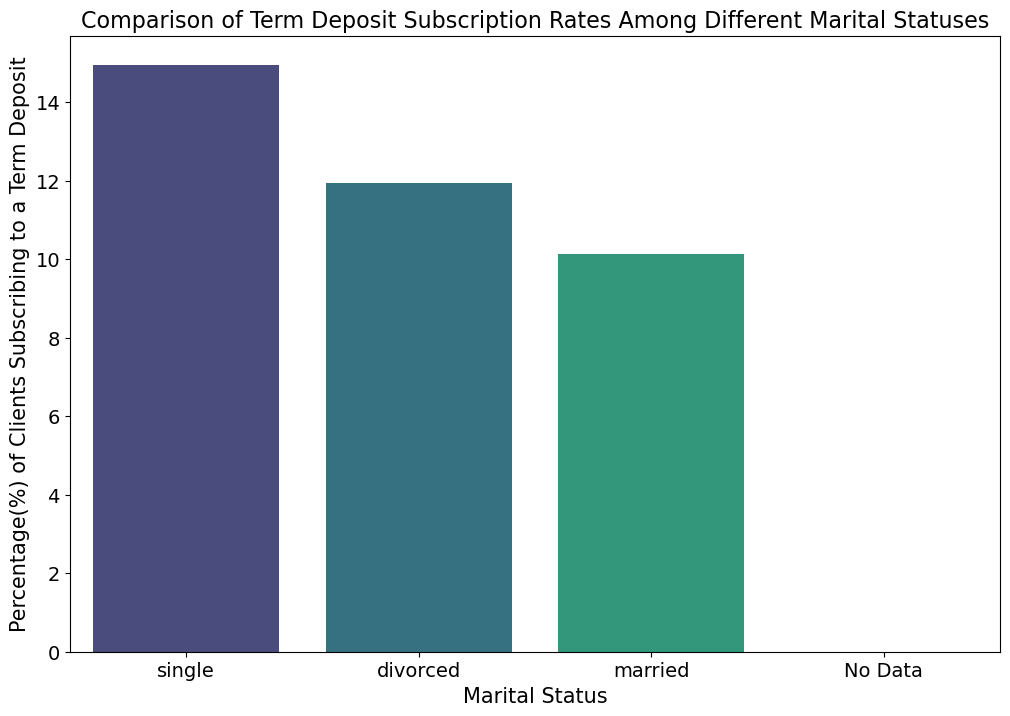

In [151]:
x = df1.groupby('marital_status')['y'].value_counts().sort_index().tolist()
status = ['No Data', 'divorced', 'married', 'single']
y = []
for i in range(1,5):
    y.append(x[2*i-1])
y = y/df1.groupby('marital_status').count()['y']*100
plt.figure(figsize=(12,8))
plt.title('Comparison of Term Deposit Subscription Rates Among Different Marital Statuses',fontsize=16)
sns.barplot(data = df1,x=status,y=y,palette='viridis',order = ['single','divorced','married','No Data'])
plt.xlabel('Marital Status',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:` 

+ Single clients have the highest subscription rates to term deposits, suggesting they might have more disposable income or different financial goals compared to other groups.

+ Divorced clients show moderately high subscription rates, possibly indicating an increased need for financial security post-divorce.

+ Married clients have a lower rate of subscription, which could reflect different financial priorities or obligations such as children and mortgages.

+ The "no data" category indicates a gap in the dataset which, if filled, could provide more accurate insights into the correlation between marital status and financial decisions.

+ Financial institutions could use these insights to tailor their marketing strategies and product designs to better meet the needs of clients with different marital statuses.

### d) education vs y

In [152]:
df1.groupby('education')['y'].value_counts().sort_index()

education  y  
No Data    no         2
           yes        1
primary    no      6259
           yes      591
secondary  no     20752
           yes     2450
tertiary   no     11304
           yes     1995
unknown    no      1605
           yes      252
Name: count, dtype: int64

In [153]:
df1['education'].cat.categories

Index(['No Data', 'primary', 'secondary', 'tertiary', 'unknown'], dtype='object')

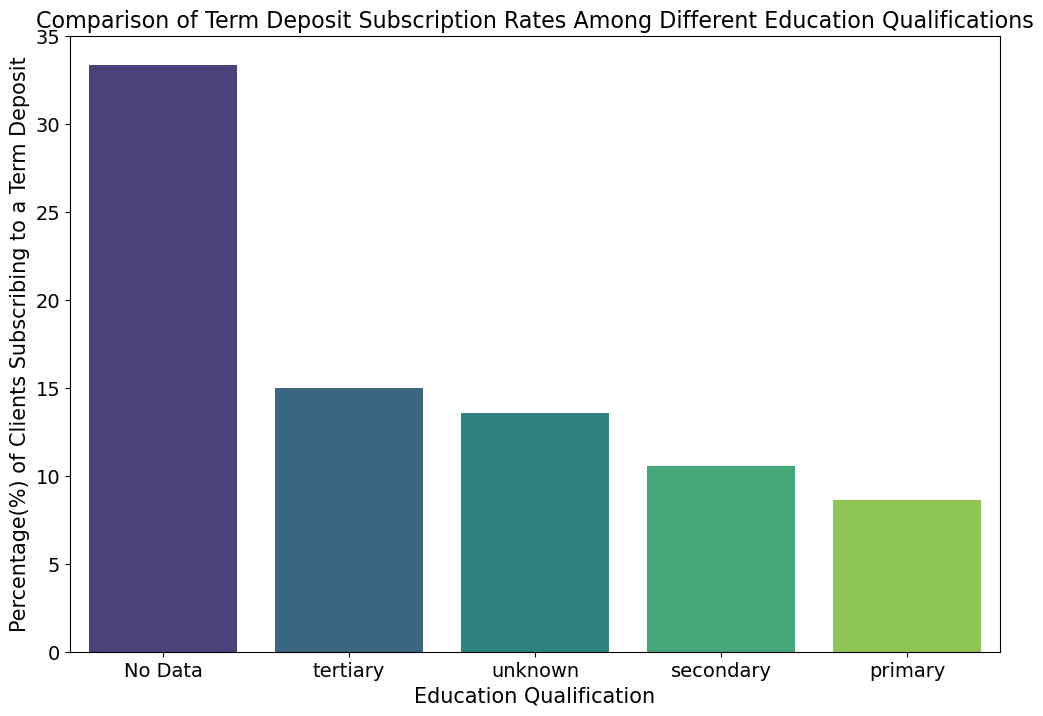

In [154]:
x = df1.groupby('education')['y'].value_counts().sort_index().tolist()
categories = ['No Data', 'primary', 'secondary', 'tertiary', 'unknown']
y = []
for i in range(1,6):
    y.append(x[2*i-1])
y =y/df1.groupby('education').count()['y']*100
plt.figure(figsize=(12,8))
plt.title('Comparison of Term Deposit Subscription Rates Among Different Education Qualifications',fontsize=16)
sns.barplot(data = df1,x=categories,y=y,palette='viridis',order = ['No Data','tertiary','unknown','secondary','primary'])
plt.xlabel('Education Qualification',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ Clients with tertiary education show a higher likelihood of subscribing to a term deposit, which could reflect better financial literacy or higher income levels that allow for such investments.

+ The subscription rate among clients with secondary education is slightly lower than those with tertiary education, suggesting a potential correlation between the level of education and investment decisions.

+ Clients with primary education have the lowest subscription rates, possibly indicating a need for more targeted financial education to promote the benefits of term deposits.

+ Some of data is missing or not recorded for clients' education qualifications, which presents a challenge for accurate analysis and targeted marketing strategies.

+ Tailored financial advice and products might be more effective if they consider the educational background of the clients, potentially increasing the subscription rates of term deposits across different educational levels.

'No Data' has the highest bar in this bar chart because the highest percentage of people from it subscribed to the term deposit and not the highest no.

### e) default status vs y

In [155]:
df1.groupby('default')['y'].value_counts().sort_index()

default  y  
no       no     39159
         yes     5237
yes      no       763
         yes       52
Name: count, dtype: int64

In [156]:
df1['default'].cat.categories

Index(['no', 'yes'], dtype='object')

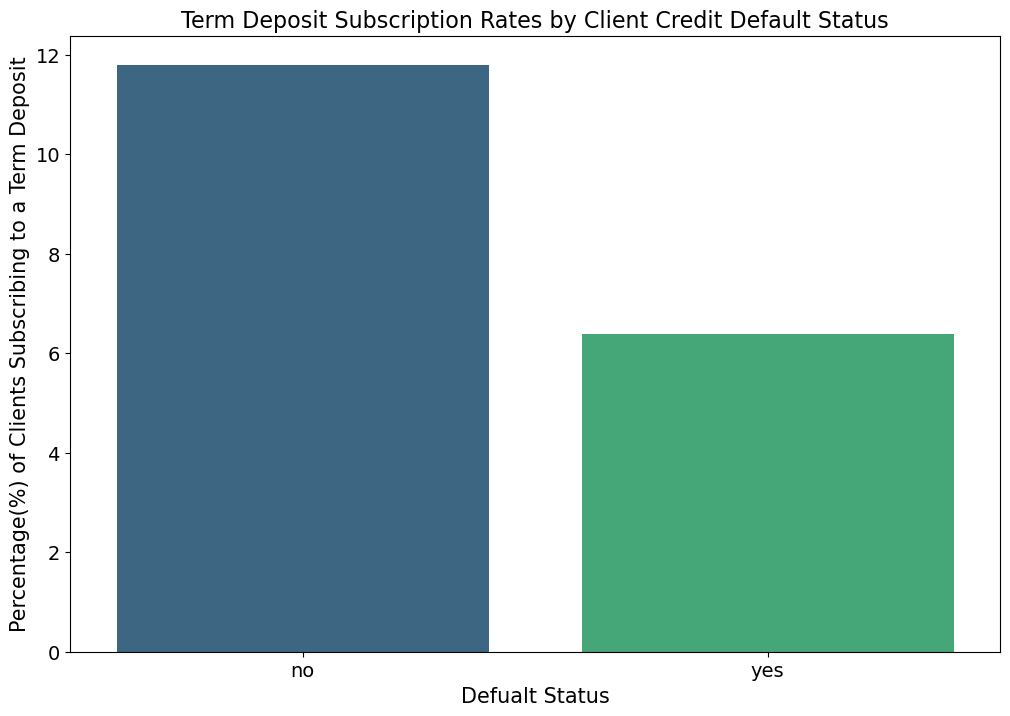

In [157]:
x = df1.groupby('default')['y'].value_counts().sort_index().tolist()
y = []
y.append(x[1])
y.append(x[3])
plt.figure(figsize=(12,8))
y = y/df1.groupby('default').count()['y']*100
plt.title('Term Deposit Subscription Rates by Client Credit Default Status',fontsize=16)
sns.barplot(data = df1,x=['no','yes'],y=y,palette='viridis',order = ['no','yes'])
plt.xlabel('Defualt Status',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ Clients with no default history are significantly more likely to subscribe to a term deposit, which may indicate a general trend of financial responsibility and stability that is attractive to banks for such investments.

+ Conversely, clients with a default history show a remarkably lower rate of subscription, suggesting that credit history is a strong indicator of term deposit subscription likelihood.

+ The data indicates that default status is a critical factor in the decision-making process for term deposits, and financial institutions may use this as a criterion for marketing such investment products.

+ The considerable difference in subscription rates between clients with and without a default history could also inform risk assessment strategies and tailor investment opportunities offered to clients.


### f) balance vs y

In [225]:
df1[(df1['balance']<10000) & (df1['y']=='no')].shape[0]

39228

In [224]:
df1[(df1['balance']<10000) & (df1['y']=='yes')].shape[0]

5154

In [ ]:
temp = df1.

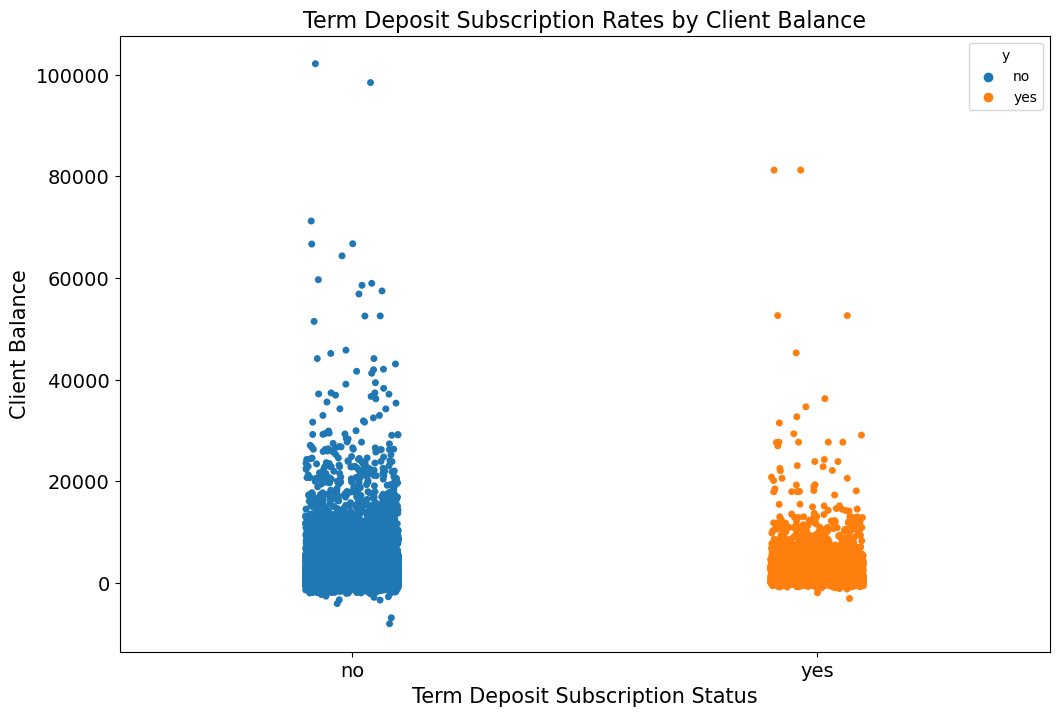

In [214]:
plt.figure(figsize=(12,8))
plt.title('Term Deposit Subscription Rates by Client Balance',fontsize=16)
sns.stripplot(data = df1,x='y',y='balance',hue='y')
plt.xlabel('Term Deposit Subscription Status',fontsize=15)
plt.ylabel('Client Balance',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim((0,20000))
plt.show()

`Conclusions:`

+ The clients with lower balances(<10000 euros) have an exceptionally low likelihood of subscribing to term deposits.

### g) housing vs y

In [161]:
df1.groupby('housing')['y'].value_counts().sort_index()

housing  y  
no       no     16727
         yes     3354
yes      no     23195
         yes     1935
Name: count, dtype: int64

In [162]:
x = df1.groupby('housing')['y'].value_counts().sort_index().tolist()

In [163]:
df1['housing'].cat.categories

Index(['no', 'yes'], dtype='object')

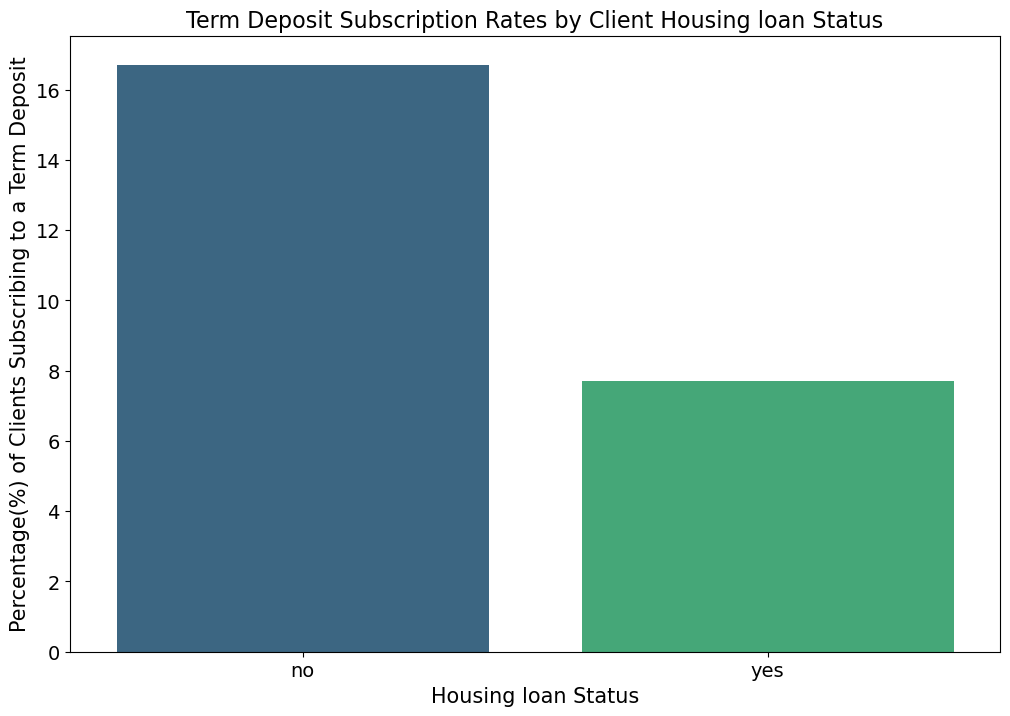

In [164]:
x = df1.groupby('housing')['y'].value_counts().sort_index().tolist()
y = []
y.append(x[1])
y.append(x[3])
y = y/df1.groupby('housing').count()['y']*100
plt.figure(figsize=(12,8))
plt.title('Term Deposit Subscription Rates by Client Housing loan Status',fontsize=16)
sns.barplot(data = df1,x=['no','yes'],y=y,palette='viridis',order = ['no','yes'])
plt.xlabel('Housing loan Status',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ Clients without a housing loan appear to have a higher rate of subscribing to a term deposit compared to those with a housing loan.

+ The data suggests that financial liabilities such as housing loans may negatively influence a client's decision to commit to a term deposit.

+ Financial institutions may consider tailoring their marketing strategies and deposit products for clients based on their loan status.

+ A deeper investigation into the reasons why clients with no housing loans are more likely to subscribe could provide insights for product development and customer engagement strategies.

+ This chart can serve as a preliminary indication for banks to potentially focus on clients without housing loans for term deposit marketing campaigns.

### h) loan vs y

In [165]:
df1.groupby('loan')['y'].value_counts().sort_index()

loan  y  
no    no     33162
      yes     4805
yes   no      6760
      yes      484
Name: count, dtype: int64

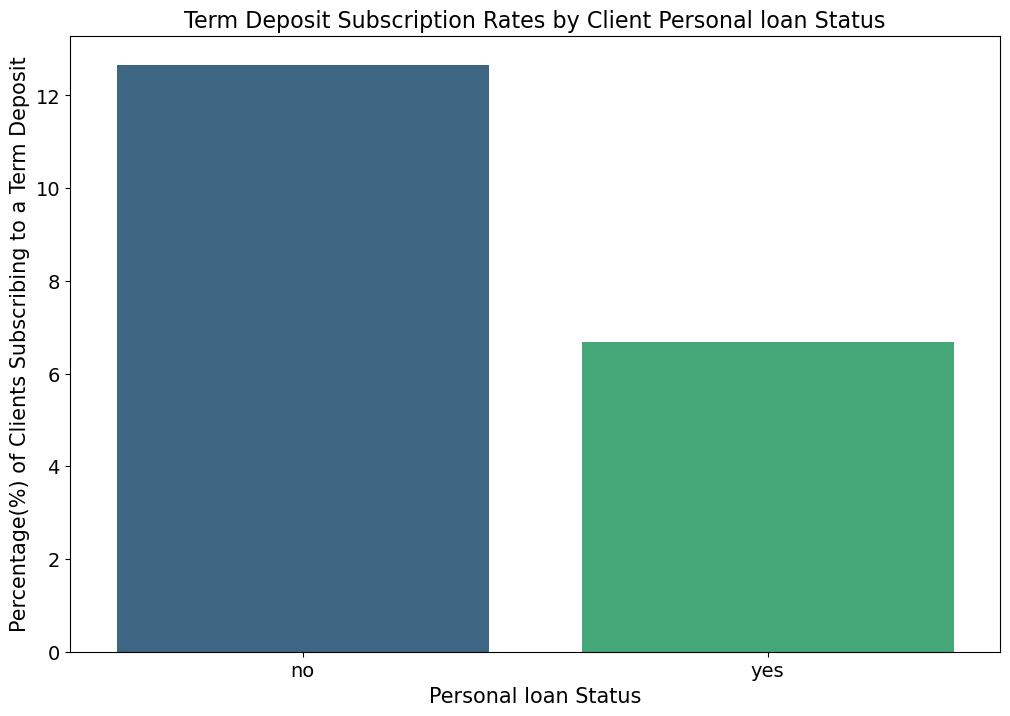

In [166]:
x = df1.groupby('loan')['y'].value_counts().sort_index().tolist()
y=[]
y.append(x[1])
y.append(x[3])
y = y/df1.groupby('loan').count()['y']*100
plt.figure(figsize=(12,8))
plt.title('Term Deposit Subscription Rates by Client Personal loan Status',fontsize=16)
sns.barplot(data = df1,x=['no','yes'],y=y,palette='viridis',order = ['no','yes'])
plt.xlabel('Personal loan Status',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ A significantly higher percentage of clients without personal loans have subscribed to term deposits compared to those with personal loans.

+ The financial burden of a personal loan seems to be inversely related to the likelihood of a client subscribing to a term deposit.

+ Clients with no personal loans may have more financial freedom to invest in savings products like term deposits.

+ Marketing strategies for term deposits might be more effective if targeted towards clients without personal loan commitments.

### i) contact vs y

In [167]:
df1.groupby('contact')['y'].value_counts().sort_index()

contact    y  
cellular   no     24916
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12490
           yes      530
Name: count, dtype: int64

In [168]:
df1['contact'].cat.categories

Index(['cellular', 'telephone', 'unknown'], dtype='object')

In [169]:
df1.groupby('contact').count()['y']*100

contact
cellular     2928500
telephone     290600
unknown      1302000
Name: y, dtype: int64

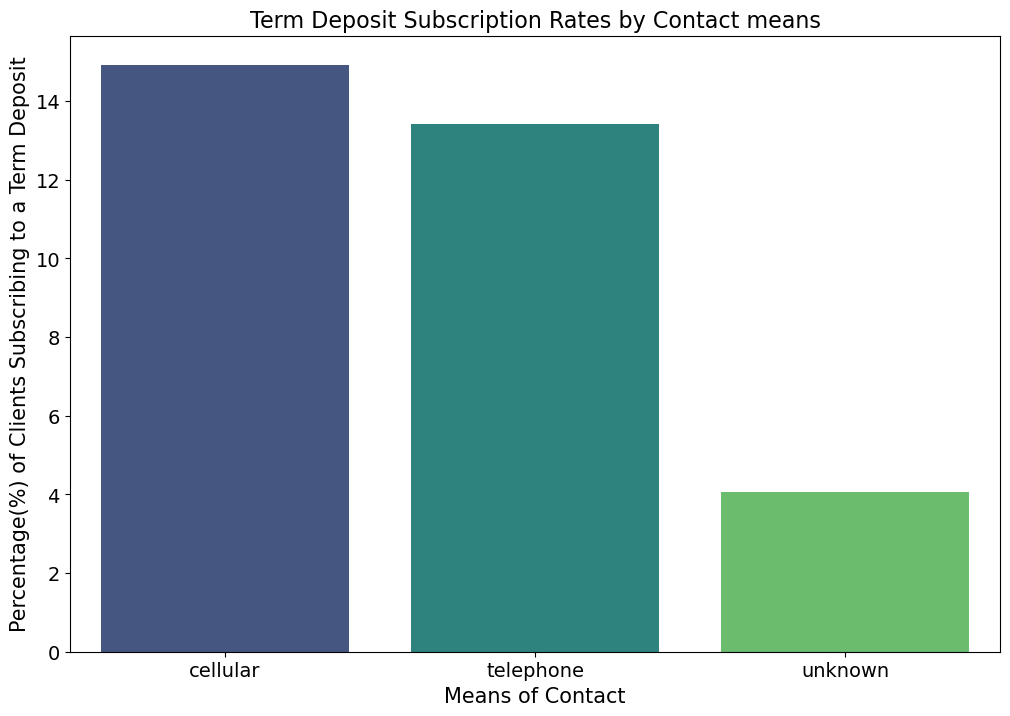

In [170]:
x = df1.groupby('contact')['y'].value_counts().sort_index().tolist()
cat = ['cellular', 'telephone', 'unknown']
y = []
y.append(x[1])
y.append(x[3])
y.append(x[5])
y = y/df1.groupby('contact').count()['y']*100
plt.figure(figsize=(12,8))
plt.title('Term Deposit Subscription Rates by Contact means',fontsize=16)
sns.barplot(data = df1,x=['cellular','telephone','unknown'],y=y,palette='viridis')
plt.xlabel('Means of Contact',fontsize=15)
plt.ylabel('Percentage(%) of Clients Subscribing to a Term Deposit',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ Contact through cellular phones leads to a higher term deposit subscription rate compared to other means of contact.

+ The least effective means of contact for term deposit subscriptions is when the means of contact is unknown.

+ Telephone contact has a moderate success rate, suggesting that while effective, it may not be as persuasive as cellular contact.

+ It may be inferred that personal and direct forms of communication (like cellular phones) could be more effective for marketing term deposits.

### j) month vs y

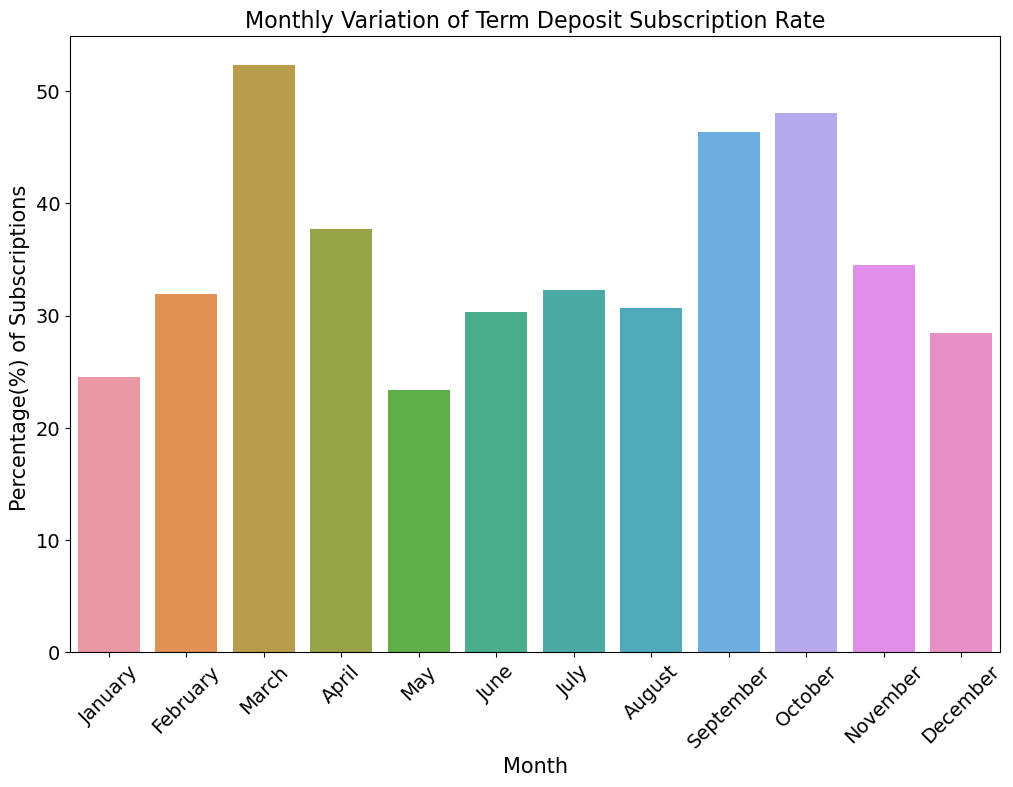

In [171]:
temp_df = df1[['date','y']]
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby(pd.Grouper(key='date', freq='M')).mean().reset_index()
temp_df = temp_df.groupby(temp_df['date'].dt.month_name()).mean().reindex(order,axis=0).drop(columns='date').reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='date',y='y')
plt.title('Monthly Variation of Term Deposit Subscription Rate',fontsize=16)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Percentage(%) of Subscriptions ',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

`Conclusions:`

+ Subscription rates for term deposits vary significantly throughout the year.
+ The highest rates of subscription appear to occur in March, which could indicate a strategic time for targeted marketing campaigns.

+ Lower subscription rates in the middle months, like June and July, could be due to seasonal factors that warrant further investigation.

+ The end of the year shows an increasing trend, suggesting that people might be more inclined to invest in term deposits during this time, possibly influenced by financial year-end considerations.

+ The data supports the need for a tailored approach to term deposit marketing throughout the year, optimizing for higher natural subscription tendencies in specific months.

### k) duration vs  y

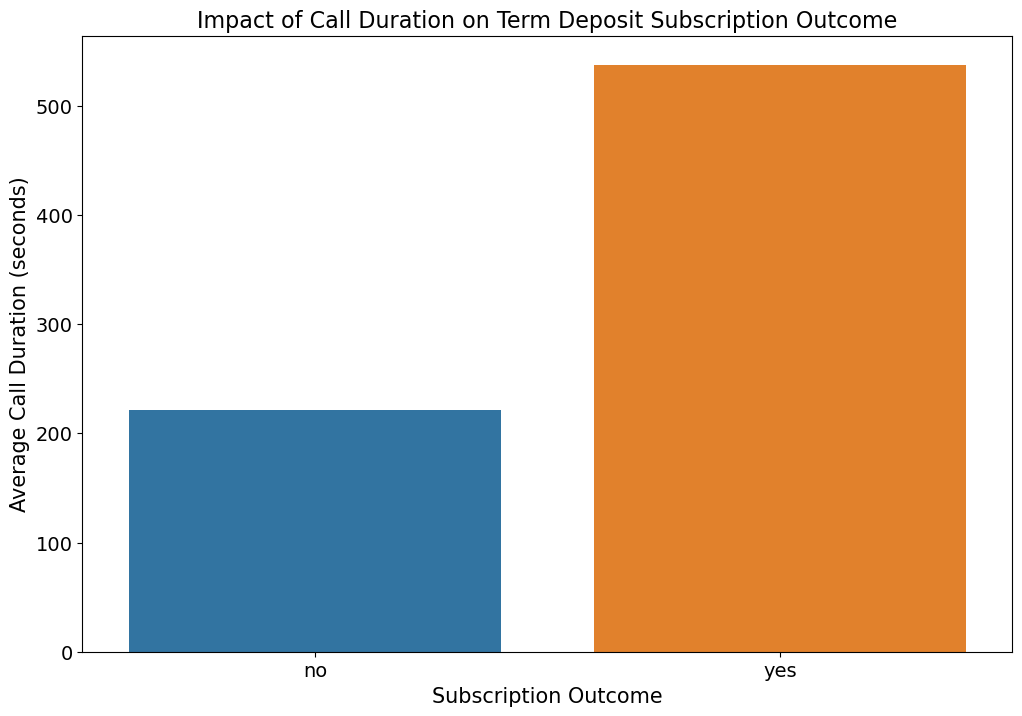

In [172]:
temp_df = df1[['duration','y']]
temp_df = temp_df.groupby('y',observed=True).mean().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='y',y='duration')
plt.title('Impact of Call Duration on Term Deposit Subscription Outcome',fontsize=16)
plt.ylabel('Average Call Duration (seconds)',fontsize=15)
plt.xlabel('Subscription Outcome',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusions:`

+ There's a substantial difference in the average call duration between clients who subscribed to a term deposit and those who did not.

+ Longer call durations are associated with a higher likelihood of subscription, which could suggest that more detailed conversations or thorough client engagement correlates with positive outcomes.

+ The graph implies that investment in training for customer representatives to effectively engage clients on calls may improve subscription rates.

+ It might be beneficial to analyze the content and quality of the calls to understand what aspects contribute to successful conversions.

+ This insight can help to refine communication strategies and prioritize call duration as a key performance indicator for sales teams.